In [1]:
### Loading the packages

import numpy as np
import pandas as pd
import statistics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from fastdtw import fastdtw
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tslearn.metrics import dtw
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr, spearmanr
import matplotlib.collections as mcoll
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

In [4]:
### Loading the patients, extract the heart rates and load the glucose values as labels

# Load the training dataset
# Load Patient 1
df_train = pd.read_csv('diabetes_subset/001/sensor_data/2014_10_01-10_09_39/2014_10_01-10_09_39_Summary.csv')
column_name = 'HR'
Pat1_d1 = df_train[column_name].values

Pat1_d1_labels = pd.read_csv('diabetes_subset/001/sensor_data/2014_10_01-10_09_39/glucose.csv')
Pat1_d1_labels = Pat1_d1_labels['glucose'].values

df_train = pd.read_csv('diabetes_subset/001/sensor_data/2014_10_02-10_56_44/2014_10_02-10_56_44_Summary.csv')
Pat1_d2 = df_train[column_name].values

Pat1_d2_labels = pd.read_csv('diabetes_subset/001/sensor_data/2014_10_02-10_56_44/glucose.csv')
Pat1_d2_labels = Pat1_d2_labels['glucose'].values

df_train = pd.read_csv('diabetes_subset/001/sensor_data/2014_10_03-06_36_24/2014_10_03-06_36_24_Summary.csv')
Pat1_d3 = df_train[column_name].values

Pat1_d3_labels = pd.read_csv('diabetes_subset/001/sensor_data/2014_10_03-06_36_24/glucose.csv')
Pat1_d3_labels = Pat1_d3_labels['glucose'].values

df_train = pd.read_csv('diabetes_subset/001/sensor_data/2014_10_04-06_34_57/2014_10_04-06_34_57_Summary.csv')
Pat1_d4 = df_train[column_name].values

Pat1_d4_labels = pd.read_csv('diabetes_subset/001/sensor_data/2014_10_04-06_34_57/glucose.csv')
Pat1_d4_labels = Pat1_d4_labels['glucose'].values



# Load Patient 2
# 2.11 keine Daten
df_train = pd.read_csv('diabetes_subset/002/sensor_data/2014_10_01-12_35_54/2014_10_01-12_35_54_Summary.csv')
Pat2_d11 = df_train[column_name].values

Pat2_d11_labels = pd.read_csv('diabetes_subset/002/sensor_data/2014_10_01-12_35_54/glucose.csv')
Pat2_d11_labels = Pat2_d11_labels['glucose'].values


df_train = pd.read_csv('diabetes_subset/002/sensor_data/2014_10_02-06_44_21/2014_10_02-06_44_21_Summary.csv')
Pat2_d2 = df_train[column_name].values

Pat2_d2_labels = pd.read_csv('diabetes_subset/002/sensor_data/2014_10_02-06_44_21/glucose.csv')
Pat2_d2_labels = Pat2_d2_labels['glucose'].values

df_train = pd.read_csv('diabetes_subset/002/sensor_data/2014_10_03-06_33_20/2014_10_03-06_33_20_Summary.csv')
Pat2_d31 = df_train[column_name].values

Pat2_d31_labels = pd.read_csv('diabetes_subset/002/sensor_data/2014_10_03-06_33_20/glucose.csv')
Pat2_d31_labels = Pat2_d31_labels['glucose'].values

df_train = pd.read_csv('diabetes_subset/002/sensor_data/2014_10_03-14_06_08/2014_10_03-14_06_08_Summary.csv')
Pat2_d32 = df_train[column_name].values

Pat2_d32_labels = pd.read_csv('diabetes_subset/002/sensor_data/2014_10_03-14_06_08/glucose.csv')
Pat2_d32_labels = Pat2_d32_labels['glucose'].values

df_train = pd.read_csv('diabetes_subset/002/sensor_data/2014_10_04-07_01_03/2014_10_04-07_01_03_Summary.csv')
Pat2_d41 = df_train[column_name].values

Pat2_d41_labels = pd.read_csv('diabetes_subset/002/sensor_data/2014_10_04-07_01_03/glucose.csv')
Pat2_d41_labels = Pat2_d41_labels['glucose'].values

df_train = pd.read_csv('diabetes_subset/002/sensor_data/2014_10_04-17_43_12/2014_10_04-17_43_12_Summary.csv')
Pat2_d42 = df_train[column_name].values

Pat2_d42_labels = pd.read_csv('diabetes_subset/002/sensor_data/2014_10_04-17_43_12/glucose.csv')
Pat2_d42_labels = Pat2_d42_labels['glucose'].values


# Load Patient 3
df_train = pd.read_csv('diabetes_subset/003/sensor_data/2014_10_01-06_00_57/2014_10_01-06_00_57_Summary.csv')
Pat3_d1 = df_train[column_name].values

Pat3_d1_labels = pd.read_csv('diabetes_subset/003/sensor_data/2014_10_01-06_00_57/glucose.csv')
Pat3_d1_labels = Pat3_d1_labels['glucose'].values


# Load Patient 4
df_train = pd.read_csv('diabetes_subset/004/sensor_data/2014_10_01-06_55_10/2014_10_01-06_55_10_Summary.csv')
Pat4_d11 = df_train[column_name].values

Pat4_d11_labels = pd.read_csv('diabetes_subset/004/sensor_data/2014_10_01-06_55_10/glucose.csv')
Pat4_d11_labels = Pat4_d11_labels['glucose'].values

df_train = pd.read_csv('diabetes_subset/004/sensor_data/2014_10_01-19_33_00/2014_10_01-19_33_00_Summary.csv')
Pat4_d12 = df_train[column_name].values

Pat4_d12_labels = pd.read_csv('diabetes_subset/004/sensor_data/2014_10_01-19_33_00/glucose.csv')
Pat4_d12_labels = Pat4_d12_labels['glucose'].values

df_train = pd.read_csv('diabetes_subset/004/sensor_data/2014_10_02-07_21_06/2014_10_02-07_21_06_Summary.csv')
Pat4_d2 = df_train[column_name].values

Pat4_d2_labels = pd.read_csv('diabetes_subset/004/sensor_data/2014_10_02-07_21_06/glucose.csv')
Pat4_d2_labels = Pat4_d2_labels['glucose'].values

df_train = pd.read_csv('diabetes_subset/004/sensor_data/2014_10_03-08_05_42/2014_10_03-08_05_42_Summary.csv')
Pat4_d3 = df_train[column_name].values

Pat4_d3_labels = pd.read_csv('diabetes_subset/004/sensor_data/2014_10_03-08_05_42/glucose.csv')
Pat4_d3_labels = Pat4_d3_labels['glucose'].values

df_train = pd.read_csv('diabetes_subset/004/sensor_data/2014_10_04-06_32_58/2014_10_04-06_32_58_Summary.csv')
Pat4_d41 = df_train[column_name].values

Pat4_d41_labels = pd.read_csv('diabetes_subset/004/sensor_data/2014_10_04-06_32_58/glucose.csv')
Pat4_d41_labels = Pat4_d41_labels['glucose'].values


df_train = pd.read_csv('diabetes_subset/005/sensor_data/2014_10_01-10_40_51/2014_10_01-10_40_51_Summary.csv')
Pat5_d12 = df_train[column_name].values

Pat5_d12_labels = pd.read_csv('diabetes_subset/005/sensor_data/2014_10_01-10_40_51/glucose.csv')
Pat5_d12_labels = Pat5_d12_labels['glucose'].values

df_train = pd.read_csv('diabetes_subset/005/sensor_data/2014_10_02-09_23_58/2014_10_02-09_23_58_Summary.csv')
Pat5_d21 = df_train[column_name].values

Pat5_d21_labels = pd.read_csv('diabetes_subset/005/sensor_data/2014_10_02-09_23_58/glucose.csv')
Pat5_d21_labels = Pat5_d21_labels['glucose'].values

df_train = pd.read_csv('diabetes_subset/005/sensor_data/2014_10_02-11_40_30/2014_10_02-11_40_30_Summary.csv')
Pat5_d22 = df_train[column_name].values

Pat5_d22_labels = pd.read_csv('diabetes_subset/005/sensor_data/2014_10_02-11_40_30/glucose.csv')
Pat5_d22_labels = Pat5_d22_labels['glucose'].values

df_train = pd.read_csv('diabetes_subset/005/sensor_data/2014_10_03-08_42_25/2014_10_03-08_42_25_Summary.csv')
Pat5_d3 = df_train[column_name].values

Pat5_d3_labels = pd.read_csv('diabetes_subset/005/sensor_data/2014_10_03-08_42_25/glucose.csv')
Pat5_d3_labels = Pat5_d3_labels['glucose'].values

df_train = pd.read_csv('diabetes_subset/005/sensor_data/2014_10_04-08_02_17/2014_10_04-08_02_17_Summary.csv')
Pat5_d4 = df_train[column_name].values

Pat5_d4_labels = pd.read_csv('diabetes_subset/005/sensor_data/2014_10_04-08_02_17/glucose.csv')
Pat5_d4_labels = Pat5_d4_labels['glucose'].values


df_train = pd.read_csv('diabetes_subset/006/sensor_data/2014_10_02-08_03_53/2014_10_02-08_03_53_Summary.csv')
Pat6_d21 = df_train[column_name].values

Pat6_d21_labels = pd.read_csv('diabetes_subset/006/sensor_data/2014_10_02-08_03_53/glucose.csv')
Pat6_d21_labels = Pat6_d21_labels['glucose'].values

df_train = pd.read_csv('diabetes_subset/006/sensor_data/2014_10_02-15_13_03/2014_10_02-15_13_03_Summary.csv')
Pat6_d22 = df_train[column_name].values

Pat6_d22_labels = pd.read_csv('diabetes_subset/006/sensor_data/2014_10_02-15_13_03/glucose.csv')
Pat6_d22_labels = Pat6_d22_labels['glucose'].values

df_train = pd.read_csv('diabetes_subset/006/sensor_data/2014_10_03-08_57_56/2014_10_03-08_57_56_Summary.csv')
Pat6_d3 = df_train[column_name].values

Pat6_d3_labels = pd.read_csv('diabetes_subset/006/sensor_data/2014_10_03-08_57_56/glucose.csv')
Pat6_d3_labels = Pat6_d3_labels['glucose'].values

df_train = pd.read_csv('diabetes_subset/006/sensor_data/2014_10_04-10_30_26/2014_10_04-10_30_26_Summary.csv')
Pat6_d4 = df_train[column_name].values

Pat6_d4_labels = pd.read_csv('diabetes_subset/006/sensor_data/2014_10_04-10_30_26/glucose.csv')
Pat6_d4_labels = Pat6_d4_labels['glucose'].values



# Load Patient 7
df_train = pd.read_csv('diabetes_subset/007/sensor_data/2014_10_01-08_42_43/2014_10_01-08_42_43_Summary.csv')
Pat7_d1 = df_train[column_name].values

Pat7_d1_labels = pd.read_csv('diabetes_subset/007/sensor_data/2014_10_01-08_42_43/glucose.csv')
Pat7_d1_labels = Pat7_d1_labels['glucose'].values

df_train = pd.read_csv('diabetes_subset/007/sensor_data/2014_10_02-07_52_44/2014_10_02-07_52_44_Summary.csv')
Pat7_d2 = df_train[column_name].values

Pat7_d2_labels = pd.read_csv('diabetes_subset/007/sensor_data/2014_10_02-07_52_44/glucose.csv')
Pat7_d2_labels = Pat7_d2_labels['glucose'].values


df_train = pd.read_csv('diabetes_subset/007/sensor_data/2014_10_04-08_27_21/2014_10_04-08_27_21_Summary.csv')
Pat7_d4 = df_train[column_name].values

Pat7_d4_labels = pd.read_csv('diabetes_subset/007/sensor_data/2014_10_04-08_27_21/glucose.csv')
Pat7_d4_labels = Pat7_d4_labels['glucose'].values



# Load Patient 8
df_train = pd.read_csv('diabetes_subset/008/sensor_data/2014_10_01-06_43_00/2014_10_01-06_43_00_Summary.csv')
Pat8_d1 = df_train[column_name].values

Pat8_d1_labels = pd.read_csv('diabetes_subset/008/sensor_data/2014_10_01-06_43_00/glucose.csv')
Pat8_d1_labels = Pat8_d1_labels['glucose'].values

df_train = pd.read_csv('diabetes_subset/008/sensor_data/2014_10_02-10_13_52/2014_10_02-10_13_52_Summary.csv')
Pat8_d2 = df_train[column_name].values

Pat8_d2_labels = pd.read_csv('diabetes_subset/008/sensor_data/2014_10_02-10_13_52/glucose.csv')
Pat8_d2_labels = Pat8_d2_labels['glucose'].values

df_train = pd.read_csv('diabetes_subset/008/sensor_data/2014_10_03-10_51_39/2014_10_03-10_51_39_Summary.csv')
Pat8_d3 = df_train[column_name].values

Pat8_d3_labels = pd.read_csv('diabetes_subset/008/sensor_data/2014_10_03-10_51_39/glucose2.csv')
Pat8_d3_labels = Pat8_d3_labels['glucose'].values

df_train = pd.read_csv('diabetes_subset/008/sensor_data/2014_10_03-22_54_51/2014_10_03-22_54_51_Summary.csv')
Pat8_d4 = df_train[column_name].values

Pat8_d4_labels = pd.read_csv('diabetes_subset/008/sensor_data/2014_10_03-22_54_51/glucose.csv')
Pat8_d4_labels = Pat8_d4_labels['glucose'].values

In [5]:
# Prepare heart rate to the same length as glucose values. Heartrates were measured every second, 
# while glucose values only were measured every 5 minutes
def resample_hr_chunk(chunk):
    median = statistics.median(chunk)
    if median == 0:
        upper_quartile = statistics.median_high(chunk)
        if upper_quartile == 0:
            return max(chunk)
        else:
            return upper_quartile
    else:
        return median

def resample_hr(hr):
    hr_filter = []
    if len(hr) == 1:
        hr_filter.append(hr[0])
    else:
        for i in range(0, len(hr), 300):
            chunk = hr[i:i + 300]
            resampled_value = resample_hr_chunk(chunk)
            hr_filter.append(resampled_value)
    return hr_filter


Pat1_d1_resampled = resample_hr(Pat1_d1)
Pat1_d2_resampled = resample_hr(Pat1_d2)
Pat1_d3_resampled = resample_hr(Pat1_d3)
Pat1_d4_resampled = resample_hr(Pat1_d4)

Pat2_d11_resampled = resample_hr(Pat2_d11)
Pat2_d2_resampled = resample_hr(Pat2_d2)
Pat2_d31_resampled = resample_hr(Pat2_d31)
Pat2_d32_resampled = resample_hr(Pat2_d32)
Pat2_d41_resampled = resample_hr(Pat2_d41)
Pat2_d42_resampled = resample_hr(Pat2_d42)

Pat3_d1_resampled = resample_hr(Pat3_d1)

Pat4_d11_resampled = resample_hr(Pat4_d11)
Pat4_d12_resampled = resample_hr(Pat4_d12)
Pat4_d2_resampled = resample_hr(Pat4_d2)
Pat4_d3_resampled = resample_hr(Pat4_d3)
Pat4_d41_resampled = resample_hr(Pat4_d41)

Pat5_d12_resampled = resample_hr(Pat5_d12)
Pat5_d21_resampled = resample_hr(Pat5_d21)
Pat5_d22_resampled = resample_hr(Pat5_d22)
Pat5_d3_resampled = resample_hr(Pat5_d3)
Pat5_d4_resampled = resample_hr(Pat5_d4)

Pat6_d21_resampled = resample_hr(Pat6_d21)
Pat6_d22_resampled = resample_hr(Pat6_d22)
Pat6_d3_resample = resample_hr(Pat6_d3)
Pat6_d4_resample = resample_hr(Pat6_d4)

Pat7_d1_resampled = resample_hr(Pat7_d1)
Pat7_d2_resampled = resample_hr(Pat7_d2)
Pat7_d4_resampled = resample_hr(Pat7_d4)

Pat8_d1_resampled = resample_hr(Pat8_d1)
Pat8_d2_resampled = resample_hr(Pat8_d2)
Pat8_d3_resampled = resample_hr(Pat8_d3)
Pat8_d4_resampled = resample_hr(Pat8_d4)

In [6]:
# Adding zeros to the time series serves to ensure that all time series have the same length, 
# which is crucial for comparing and analyzing different data without losing actual data.
def append_zeros(lst, count):
    for _ in range(count):
        lst.append(0)

def insert_zeros(lst, index, count):
    for _ in range(count):
        lst.insert(index, 0)
        index += 1

# Pat1
append_zeros(Pat1_d1_resampled, 20)
print(len(Pat1_d1_resampled))
print(len(Pat1_d1_labels))

append_zeros(Pat1_d2_resampled, 28)
for i in range(131):
    Pat1_d2_labels = np.delete(Pat1_d2_labels, 0)

print(len(Pat1_d2_resampled))
print(len(Pat1_d2_labels))

append_zeros(Pat1_d3_resampled, 56)
for i in range(79):
    Pat1_d3_labels = np.delete(Pat1_d3_labels, 0)
print(len(Pat1_d3_resampled))
print(len(Pat1_d3_labels))

append_zeros(Pat1_d4_resampled, 123)
for i in range(78):
    Pat1_d4_labels = np.delete(Pat1_d4_labels, 0)
print(len(Pat1_d4_resampled))
print(len(Pat1_d4_labels))

# Pat2
append_zeros(Pat2_d11_resampled, 2)
print(len(Pat2_d11_resampled))
print(len(Pat2_d11_labels))

append_zeros(Pat2_d2_resampled, 48)
for i in range(80):
    Pat2_d2_labels = np.delete(Pat2_d2_labels, 0)
print(len(Pat2_d2_resampled))
print(len(Pat2_d2_labels))

append_zeros(Pat2_d31_resampled, 5)
for i in range(78):
    Pat2_d31_labels = np.delete(Pat2_d31_labels, 0)

print(len(Pat2_d31_resampled))
print(len(Pat2_d31_labels))

append_zeros(Pat2_d32_resampled, 43)
print(len(Pat2_d32_resampled))
print(len(Pat2_d32_labels))

append_zeros(Pat2_d41_resampled, 11)
for i in range(83):
    Pat2_d41_labels = np.delete(Pat2_d41_labels, 0)
print(len(Pat2_d41_resampled))
print(len(Pat2_d41_labels))

append_zeros(Pat2_d42_resampled, 46)
print(len(Pat2_d42_resampled))
print(len(Pat2_d42_labels))

# Pat3
append_zeros(Pat3_d1_resampled, 22)

# Pat4
append_zeros(Pat4_d11_resampled, 11)

append_zeros(Pat4_d12_resampled, 48)

append_zeros(Pat4_d2_resampled, 54)
for i in range(86):
    Pat4_d2_labels = np.delete(Pat4_d2_labels, 0)

append_zeros(Pat4_d3_resampled, 95)
for i in range(96):
    Pat4_d3_labels = np.delete(Pat4_d3_labels, 0)

for i in range(78):
    Pat4_d41_labels = np.delete(Pat4_d41_labels, 0)

print(len(Pat4_d41_labels))
print(len(Pat4_d41_resampled))

# Pat5
append_zeros(Pat5_d12_resampled, 18)
print(len(Pat5_d12_labels))
print(len(Pat5_d12_resampled))

for i in range(113):
    Pat5_d21_labels = np.delete(Pat5_d21_labels, 0)
print(len(Pat5_d21_resampled))
print(len(Pat5_d21_labels))


append_zeros(Pat5_d22_resampled, 11)
print(len(Pat5_d22_resampled))
print(len(Pat5_d22_labels))

append_zeros(Pat5_d3_resampled, 15)
for i in range(104):
    Pat5_d3_labels = np.delete(Pat5_d3_labels, 0)

print(len(Pat5_d3_resampled))
print(len(Pat5_d3_labels))

for i in range(97):
    Pat5_d4_labels = np.delete(Pat5_d4_labels, 0)

print(len(Pat5_d4_resampled))
print(len(Pat5_d4_labels))

# Pat6
append_zeros(Pat6_d21_resampled, 1)
for i in range(97):
    Pat6_d21_labels = np.delete(Pat6_d21_labels, 0)
print(len(Pat6_d21_resampled))
print(len(Pat6_d21_labels))

append_zeros(Pat6_d22_resampled, 25)
for i in range(2):
    Pat6_d22_labels = np.delete(Pat6_d22_labels, 0)
print(len(Pat6_d22_resampled))
print(len(Pat6_d22_labels))
print(len(Pat6_d22_resampled))
print(len(Pat6_d22_labels))

append_zeros(Pat6_d3_resample, 13)
for i in range(107):
    Pat6_d3_labels = np.delete(Pat6_d3_labels, 0)
print(len(Pat6_d3_resample))
print(len(Pat6_d3_labels))

append_zeros(Pat6_d4_resample, 24)
for i in range(126):
    Pat6_d4_labels = np.delete(Pat6_d4_labels, 0)
print(len(Pat6_d4_resample))
print(len(Pat6_d4_labels))

# Pat7
append_zeros(Pat7_d1_resampled, 3)
print(len(Pat7_d1_resampled))
print(len(Pat7_d1_labels))

append_zeros(Pat7_d2_resampled, 62)
for i in range(94):
    Pat7_d2_labels = np.delete(Pat7_d2_labels, 0)
print(len(Pat7_d2_resampled))
print(len(Pat7_d2_labels))

append_zeros(Pat7_d4_resampled, 22)
for i in range(101):
    Pat7_d4_labels = np.delete(Pat7_d4_labels, 0)
print(len(Pat7_d4_resampled))
print(len(Pat7_d4_labels))

# Pat8
append_zeros(Pat8_d1_resampled, 23)
for i in range(80):
    Pat8_d1_labels = np.delete(Pat8_d1_labels, 0)
print(len(Pat8_d1_resampled))
print(len(Pat8_d1_labels))

for i in range(123):
    Pat8_d2_labels = np.delete(Pat8_d2_labels, 0)
print(len(Pat8_d2_resampled))
print(len(Pat8_d2_labels))

append_zeros(Pat8_d3_resampled, 13)
for i in range(130):
    Pat8_d3_labels = np.delete(Pat8_d3_labels, 0)
print(len(Pat8_d3_resampled))
print(len(Pat8_d3_labels))

append_zeros(Pat8_d4_resampled, 11)
print(len(Pat8_d4_resampled))
print(len(Pat8_d4_labels))

58
58
157
157
209
209
210
210
14
14
208
208
91
91
119
119
129
129
76
76
124
124
150
150
27
27
148
148
184
184
86
86
58
58
102
102
102
102
181
181
162
162
147
147
193
193
187
187
208
208
166
166
158
158
109
109


In [7]:
# Concatenating the different days for patients to one single patient

Pat1 = Pat1_d1_resampled + Pat1_d2_resampled + Pat1_d3_resampled + Pat1_d4_resampled
Pat2 = Pat2_d11_resampled + Pat2_d2_resampled + Pat2_d31_resampled + Pat2_d32_resampled + \
       Pat2_d41_resampled + Pat2_d42_resampled
Pat4 = Pat4_d11_resampled + Pat4_d12_resampled + Pat4_d2_resampled + Pat4_d3_resampled + Pat4_d41_resampled
Pat5 = Pat5_d12_resampled + Pat5_d21_resampled + Pat5_d22_resampled + Pat5_d3_resampled + Pat5_d4_resampled
Pat6 = Pat6_d21_resampled + Pat6_d22_resampled + Pat6_d3_resample + Pat6_d4_resample
Pat7 = Pat7_d1_resampled + Pat7_d2_resampled + Pat7_d4_resampled
Pat8 = Pat8_d1_resampled + Pat8_d2_resampled + Pat8_d3_resampled + Pat8_d4_resampled

In [8]:
# Interpolate missing heart rate values

def interpolate_hr(hr):
    for i in range(len(hr)):
        if hr[i] == 0:
            left = i - 1
            while left >= 0 and hr[left] == 0:
                left -= 1
            right = i + 1
            while right < len(hr) and hr[right] == 0:
                right += 1
            if left < 0 or right >= len(hr):
                hr[i] = hr[left] if left >= 0 else hr[right]
            else:
                hr[i] = hr[left] + (hr[right] - hr[left]) * (i - left) / (right - left)


interpolate_hr(Pat1)
interpolate_hr(Pat2)
interpolate_hr(Pat3_d1_resampled)
interpolate_hr(Pat4)
interpolate_hr(Pat5)
interpolate_hr(Pat6)
interpolate_hr(Pat7)
interpolate_hr(Pat8)

In [9]:
# Transform labels if the glucose value is below 4 the label is 1, otherwise it is 0

def transform_labels(labels):
    labels_concatenated = []
    for label_value in labels:
        if label_value < 4:
            labels_concatenated.append(1)
        else:
            labels_concatenated.append(0)
    return labels_concatenated


def numpy_to_list(array):
    return array.tolist()

In [10]:
# Converting the labels to a list

Pat1_d1_labels = numpy_to_list(Pat1_d1_labels)
Pat1_d2_labels = numpy_to_list(Pat1_d2_labels)
Pat1_d3_labels = numpy_to_list(Pat1_d3_labels)
Pat1_d4_labels = numpy_to_list(Pat1_d4_labels)

Pat2_d11_labels = numpy_to_list(Pat2_d11_labels)
Pat2_d2_labels = numpy_to_list(Pat2_d2_labels)
Pat2_d31_labels = numpy_to_list(Pat2_d31_labels)
Pat2_d32_labels = numpy_to_list(Pat2_d32_labels)
Pat2_d41_labels = numpy_to_list(Pat2_d41_labels)
Pat2_d42_labels = numpy_to_list(Pat2_d42_labels)

Pat4_d11_labels = numpy_to_list(Pat4_d11_labels)
Pat4_d12_labels = numpy_to_list(Pat4_d12_labels)
Pat4_d2_labels = numpy_to_list(Pat4_d2_labels)
Pat4_d3_labels = numpy_to_list(Pat4_d3_labels)
Pat4_d41_labels = numpy_to_list(Pat4_d41_labels)

Pat5_d12_labels = numpy_to_list(Pat5_d12_labels)
Pat5_d21_labels = numpy_to_list(Pat5_d21_labels)
Pat5_d22_labels = numpy_to_list(Pat5_d22_labels)
Pat5_d3_labels = numpy_to_list(Pat5_d3_labels)
Pat5_d4_labels = numpy_to_list(Pat5_d4_labels)

Pat6_d21_labels = numpy_to_list(Pat6_d21_labels)
Pat6_d22_labels = numpy_to_list(Pat6_d22_labels)
Pat6_d3_labels = numpy_to_list(Pat6_d3_labels)
Pat6_d4_labels = numpy_to_list(Pat6_d4_labels)

Pat7_d1_labels = numpy_to_list(Pat7_d1_labels)
Pat7_d2_labels = numpy_to_list(Pat7_d2_labels)
Pat7_d4_labels = numpy_to_list(Pat7_d4_labels)

Pat8_d1_labels = numpy_to_list(Pat8_d1_labels)
Pat8_d2_labels = numpy_to_list(Pat8_d2_labels)
Pat8_d3_labels = numpy_to_list(Pat8_d3_labels)
Pat8_d4_labels = numpy_to_list(Pat8_d4_labels)

In [11]:
# Concat all Labels for every Patient

Pat1_l = Pat1_d1_labels + Pat1_d2_labels + Pat1_d3_labels + Pat1_d4_labels
Pat2_l = Pat2_d11_labels + Pat2_d2_labels + Pat2_d31_labels + Pat2_d32_labels + Pat2_d41_labels + Pat2_d42_labels
Pat4_l = Pat4_d11_labels + Pat4_d12_labels + Pat4_d2_labels + Pat4_d3_labels + Pat4_d41_labels
Pat5_l = Pat5_d12_labels + Pat5_d21_labels + Pat5_d22_labels + Pat5_d3_labels + Pat5_d4_labels
Pat6_l = Pat6_d21_labels + Pat6_d22_labels + Pat6_d3_labels + Pat6_d4_labels
Pat7_l = Pat7_d1_labels + Pat7_d2_labels + Pat7_d4_labels
Pat8_l = Pat8_d1_labels + Pat8_d2_labels + Pat8_d3_labels + Pat8_d4_labels

In [12]:
# Transform Labels

Pat1_labels = transform_labels(Pat1_l)
Pat2_labels = transform_labels(Pat2_l)
Pat3_labels = transform_labels(Pat3_d1_labels)
Pat4_labels = transform_labels(Pat4_l)
Pat5_labels = transform_labels(Pat5_l)
Pat6_labels = transform_labels(Pat6_l)
Pat7_labels = transform_labels(Pat7_l)
Pat8_labels = transform_labels(Pat8_l)

In [13]:
# Put the patients and the labels in an array
patients = [Pat1, Pat2, Pat4, Pat5, Pat6]
patient_labels = [Pat1_labels, Pat2_labels, Pat4_labels, Pat5_labels, Pat6_labels]
# Create a list to hold patient data
data = []

# Create a dictionary. Put the patients in it. Every patient has its own entry.
# Loop over the patients starting from i=1
for i, patient in enumerate(zip(patients, patient_labels), start=1):
    patient_data = {
        "ID": i,
        "HeartRate": patient,
        "Labels": patient_labels
    }
    data.append(patient_data)

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(data)

# Print the first entry of the DataFrame
print(df.iloc[0])

ID                                                           1
HeartRate    ([67.0, 68.0, 94.0, 95.0, 83.0, 80.0, 79.0, 79...
Labels       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
Name: 0, dtype: object


In [14]:
print(len(data))

5


In [15]:
# In this code section, a function called "ShapeletSelectionMultiPatient" that extracts shapelets from time series data is defined. 
# This process involves generating candidate shapelets, calculating the DTW distance between these candidates and the data, 
# evaluating the candidates based on their qualities, and finally selecting the best shapelets. 
# The function takes as input data from multiple patients, a range of lengths for the shapelets, and the number of shapelets to extract.

# The function "generateCandidates" creates a list of candidate 
# shapelets from the time series "T" with a specified length "l" by sliding a sliding window over the time series.
def generateCandidates(T, l):
    candidates = []
    n = len(T)
    for i in range(n - l + 1):
        candidates.append(T[i:i + l])
    return candidates

# The function "calculate_dtw_distance" calculates the Dynamic Time Warping (DTW) distance between two sequences "sequence1" and "sequence2". 
# It checks if the sequences are float values and converts them to lists if necessary. Then it calculates and returns the DTW distance between 
# the sequences using the "fastdtw" function. This is useful to quantify the similarity between two time series.
def calculate_dtw_distance(sequence1, sequence2):
    if isinstance(sequence1, (float, np.float64)):
        sequence1 = [sequence1]
    if isinstance(sequence2, (float, np.float64)):
        sequence2 = [sequence2]

    distance, _ = fastdtw(sequence1, sequence2)
    return distance



# The "findDistances" function calculates the Dynamic Time Warping (DTW) distances between a given sequence "S" and a collection of sequences "T". 
# The function uses the previously defined "calculate_dtw_distance" function to calculate the DTW distance between "S" and each section in "T". 
# The results are stored and returned in a list "distances". This allows to determine the DTW distance between "S" and different parts of 
# the sequences in "T", which can be useful in various applications such as pattern recognition and similarity matching.
def findDistances(S, T):
    distances = []
    l = len(S)
    for i in range(len(T) - l + 1):
        distance = calculate_dtw_distance(T[i:i + l], S)
        distances.append(distance)
    return distances



# The function "assessCandidate" evaluates the quality of a candidate shapelet "S" based on the calculated DTW distances "DS" and 
# the associated class labels "labels". First, the indices for positive and negative labels are determined separately. 
# If there are no positive or negative labels (one of the two categories is empty), a negative infinite value ("float('-inf')") is 
# returned to indicate that this candidate is unsuitable.

# Otherwise, the DTW distances for the positive and negative labels are extracted from "DS". 
# These distances are stored in the "positive_distances" and "negative_distances" lists. Finally, 
# the quality of the candidate shapelet is calculated and returned as the difference between the average of the positive distances and 
# the average of the negative distances.
def assessCandidate(S, DS, labels):
    positive_indices = [i for i, label in enumerate(labels) if label == 1]
    negative_indices = [i for i, label in enumerate(labels) if label == 0]

    if len(positive_indices) == 0 or len(negative_indices) == 0:
        return float("-inf")

    positive_distances = [DS[i] for i in positive_indices if i < len(DS)]
    negative_distances = [DS[i] for i in negative_indices if i < len(DS)]

    return np.mean(positive_distances) - np.mean(negative_distances)


# The ShapeletSelectionMultiPatient function selects shapelets to classify heart rate time series from multiple patients. 
# It creates candidate shapelets, evaluates them, and saves the best shapelets based on their quality and desired number (k). 
# This enables the selection of effective shapelets for classifying time series data in a multiple patient context.

def ShapeletSelectionMultiPatient(data, minimum_length, maximum_length, k):
    shapelets = []
    qualities = []

    for entry in data:
        patient_segments = entry["HeartRate"]  # Access the "HeartRateSegments" key
        labels = entry["Labels"][0]   # Access the first row of the "Labels" array

        for segment in patient_segments:
            for l in range(minimum_length, maximum_length + 1):
                Wl = generateCandidates(segment, l)
                for S in Wl:
                    DS = findDistances(S, segment)
                    quality = assessCandidate(S, DS, labels)
                    if len(shapelets) < k:
                        shapelets.append(S)
                        qualities.append(quality)
                    else:
                        min_quality_index = np.argmin(qualities)
                        if quality > qualities[min_quality_index]:
                            shapelets[min_quality_index] = S
                            qualities[min_quality_index] = quality
    
    return shapelets

In [15]:
# The Shapelet Selection is performed here without using the labels

# Perform shapelet detection on the training data
def generateCandidates(T, l):
    candidates = []
    n = len(T)
    for i in range(n - l + 1):
        candidates.append(T[i:i + l])
    return candidates

def calculate_dtw_distance(sequence1, sequence2):
    if isinstance(sequence1, (float, np.float64)):
        sequence1 = [sequence1]
    if isinstance(sequence2, (float, np.float64)):
        sequence2 = [sequence2]

    distance, _ = fastdtw(sequence1, sequence2)
    return distance

def findDistances(S, T):
    distances = []
    l = len(S)
    for i in range(len(T) - l + 1):
        distance = calculate_dtw_distance(T[i:i + l], S)
        distances.append(distance)
    return distances

def assessCandidate(S, DS):
    return np.mean(DS)

def ShapeletSelectionMultiPatient(data, minimum_length, maximum_length, k):
    shapelets = []
    qualities = []

    for entry in data:
        patient_segments = entry["HeartRate"]  # Access the "HeartRateSegments" key

        for segment in patient_segments:
            for l in range(minimum_length, maximum_length + 1):
                Wl = generateCandidates(segment, l)
                for S in Wl:
                    DS = findDistances(S, segment)
                    quality = assessCandidate(S, DS)
                    if len(shapelets) < k:
                        shapelets.append(S)
                        qualities.append(quality)
                    else:
                        min_quality_index = np.argmin(qualities)
                        if quality > qualities[min_quality_index]:
                            shapelets[min_quality_index] = S
                            qualities[min_quality_index] = quality
    
    return shapelets


In [16]:
Pat1 = np.array(Pat1)
Pat1 = np.reshape(Pat1, (len(Pat1), -1))

Pat2 = np.array(Pat2)
Pat2 = np.reshape(Pat2, (len(Pat2), -1))

Pat4 = np.array(Pat4)
Pat4 = np.reshape(Pat4, (len(Pat4), -1))

Pat5 = np.array(Pat5)
Pat5 = np.reshape(Pat5, (len(Pat5), -1))

Pat6 = np.array(Pat6)
Pat6 = np.reshape(Pat6, (len(Pat6), -1))

Pat7 = np.array(Pat7)
Pat7 = np.reshape(Pat7, (len(Pat7), -1))

Pat8 = np.array(Pat8)
Pat8 = np.reshape(Pat8, (len(Pat8), -1))


In [17]:
# In this section, the Pearson and Spearman correlation coefficients are calculated. 
# This allows the evaluation of the linear and non-linear relationships between the two data sets and provides a correlation value for each. 
# This is used to analyze and quantify the relationship between the heart rate time series  and the labels.

Pat1_l_corr = np.array(Pat1_l, dtype=float)
Pat1_corr = np.array(Pat1, dtype=float)

Pat1_corr = Pat1_corr.flatten()
# Pearson-Korrelation
pearson_corr, _ = pearsonr(Pat1_corr, Pat1_l_corr)
print(f"Pearson-Korrelation: {pearson_corr:.2f}")

# Spearman-Korrelation
spearman_corr, _ = spearmanr(Pat1_corr, Pat1_l_corr)
print(f"Spearman-Korrelation: {spearman_corr:.2f}")

##############################

Pat2_l_corr = np.array(Pat2_l, dtype=float)
Pat2_corr = np.array(Pat2, dtype=float)

Pat2_corr = Pat2_corr.flatten()
# Pearson-Korrelation
pearson_corr, _ = pearsonr(Pat2_corr, Pat2_l_corr)
print(f"Pearson-Korrelation: {pearson_corr:.2f}")

# Spearman-Korrelation
spearman_corr, _ = spearmanr(Pat2_corr, Pat2_l_corr)
print(f"Spearman-Korrelation: {spearman_corr:.2f}")


########################################

Pat4_l_corr = np.array(Pat4_l, dtype=float)
Pat4_corr = np.array(Pat4, dtype=float)

Pat4_corr = Pat4_corr.flatten()
# Pearson-Korrelation
pearson_corr, _ = pearsonr(Pat4_corr, Pat4_l_corr)
print(f"Pearson-Korrelation: {pearson_corr:.2f}")

# Spearman-Korrelation
spearman_corr, _ = spearmanr(Pat4_corr, Pat4_l_corr)
print(f"Spearman-Korrelation: {spearman_corr:.2f}")

#############################################
Pat5_l_corr = np.array(Pat5_l, dtype=float)
Pat5_corr = np.array(Pat5, dtype=float)

Pat5_corr = Pat5_corr.flatten()
# Pearson-Korrelation
pearson_corr, _ = pearsonr(Pat5_corr, Pat5_l_corr)
print(f"Pearson-Korrelation: {pearson_corr:.2f}")

# Spearman-Korrelation
spearman_corr, _ = spearmanr(Pat5_corr, Pat5_l_corr)
print(f"Spearman-Korrelation: {spearman_corr:.2f}")

##########################################
Pat6_l_corr = np.array(Pat6_l, dtype=float)
Pat6_corr = np.array(Pat6, dtype=float)

Pat6_corr = Pat6_corr.flatten()
# Pearson-Korrelation
pearson_corr, _ = pearsonr(Pat6_corr, Pat6_l_corr)
print(f"Pearson-Korrelation: {pearson_corr:.2f}")

# Spearman-Korrelation
spearman_corr, _ = spearmanr(Pat6_corr, Pat6_l_corr)
print(f"Spearman-Korrelation: {spearman_corr:.2f}")

##########################################

Pat7_l_corr = np.array(Pat7_l, dtype=float)
Pat7_corr = np.array(Pat7, dtype=float)

Pat7_corr = Pat7_corr.flatten()
# Pearson-Korrelation
pearson_corr, _ = pearsonr(Pat7_corr, Pat7_l_corr)
print(f"Pearson-Korrelation: {pearson_corr:.2f}")

# Spearman-Korrelation
spearman_corr, _ = spearmanr(Pat7_corr, Pat7_l_corr)
print(f"Spearman-Korrelation: {spearman_corr:.2f}")

################################################

Pat8_l_corr = np.array(Pat8_l, dtype=float)
Pat8_corr = np.array(Pat8, dtype=float)

Pat8_corr = Pat8_corr.flatten()
# Pearson-Korrelation
pearson_corr, _ = pearsonr(Pat8_corr, Pat8_l_corr)
print(f"Pearson-Korrelation: {pearson_corr:.2f}")

# Spearman-Korrelation
spearman_corr, _ = spearmanr(Pat8_corr, Pat8_l_corr)
print(f"Spearman-Korrelation: {spearman_corr:.2f}")




Pearson-Korrelation: 0.19
Spearman-Korrelation: 0.13
Pearson-Korrelation: -0.22
Spearman-Korrelation: -0.18
Pearson-Korrelation: 0.04
Spearman-Korrelation: 0.07
Pearson-Korrelation: -0.08
Spearman-Korrelation: -0.07
Pearson-Korrelation: 0.07
Spearman-Korrelation: 0.03
Pearson-Korrelation: -0.03
Spearman-Korrelation: -0.17
Pearson-Korrelation: -0.44
Spearman-Korrelation: -0.40


In [24]:
# Patients with diabetes
patient_data = [Pat1_l, Pat2_l, Pat3_d1_labels, Pat4_l, Pat5_l, Pat6_l, Pat7_l, Pat8_l]

# Loop through the patient data
for i, data in enumerate(patient_data):
    # Create a Boxplot
    plt.boxplot(data)
    
    plt.xlabel('Patient ' + str(i + 1))
    plt.ylabel('Glucose Values')
    plt.title('Distribution of glucose values for patient ' + str(i + 1))

    # Saving the boxplot as an image (e.g., PNG)
    filename = 'boxplot' + str(i +1) + '.png'
    plt.savefig(filename)

    # Reset the plot for the next diagram
    plt.clf()

# Show the Boxplot
plt.show()

<Figure size 640x480 with 0 Axes>

In [24]:
# Healthy Patients
Pat1_healthy_labels = pd.read_csv('Data/healthy_glucose001.csv')
Pat1_healthy_labels = Pat1_healthy_labels['glucose'].values

Pat3_healthy_labels = pd.read_csv('Data/healthy_glucose003.csv')
Pat3_healthy_labels = Pat3_healthy_labels['glucose'].values
patient_data = [Pat1_healthy_labels, Pat3_healthy_labels]

# Loop through the patient data
for i, data in enumerate(patient_data):
    # Create a Boxplot
    plt.boxplot(data)
    
    plt.xlabel('Patient ' + str(i + 1))
    plt.ylabel('Glucose Values')
    plt.title('Distribution of glucose values for patient ' + str(i + 1))

    # Saving the boxplot as an image (e.g., PNG)
    filename = 'healthy boxplot' + str(i +1) + '.png'
    plt.savefig(filename)

    # Reset the plot for the next diagram
    plt.clf()

# Show the Boxplot
plt.show()

<Figure size 640x480 with 0 Axes>

In [18]:
k = 8  # Number of shapelets
shapelet_length = 12 # Length of the every shapelet
shapelets = ShapeletSelectionMultiPatient(data, shapelet_length, shapelet_length, k)

In [19]:
print(shapelets)

[[102.0, 93, 92.36363636363636, 91.72727272727272, 91.09090909090908, 90.45454545454544, 89.8181818181818, 89.18181818181816, 88.54545454545452, 87.90909090909088, 87.27272727272724, 86.6363636363636], [107.0, 103.0, 101.0, 95.0, 94.0, 95.0, 94.0, 95.0, 97.0, 95.0, 93.0, 94.0], [97.0, 99, 97.41666666666667, 95.83333333333334, 94.25000000000001, 92.66666666666669, 91.08333333333334, 89.50000000000001, 87.91666666666669, 86.33333333333334, 84.75, 83.16666666666667], [110.0, 98.0, 95.0, 94.0, 95.0, 95.0, 93.0, 94.0, 94.0, 91.0, 95.0, 96.0], [100.0, 100.5, 95.0, 95.0, 97.0, 94.0, 90.0, 90.0, 95.0, 94.0, 88.0, 88.0], [100.5, 95.0, 95.0, 97.0, 94.0, 90.0, 90.0, 95.0, 94.0, 88.0, 88.0, 87.0], [106.0, 108.0, 107.0, 107.0, 107.0, 104.0, 106.0, 108.0, 104.0, 107.0, 103.0, 101.0], [105.0, 102.0, 93, 92.36363636363636, 91.72727272727272, 91.09090909090908, 90.45454545454544, 89.8181818181818, 89.18181818181816, 88.54545454545452, 87.90909090909088, 87.27272727272724]]


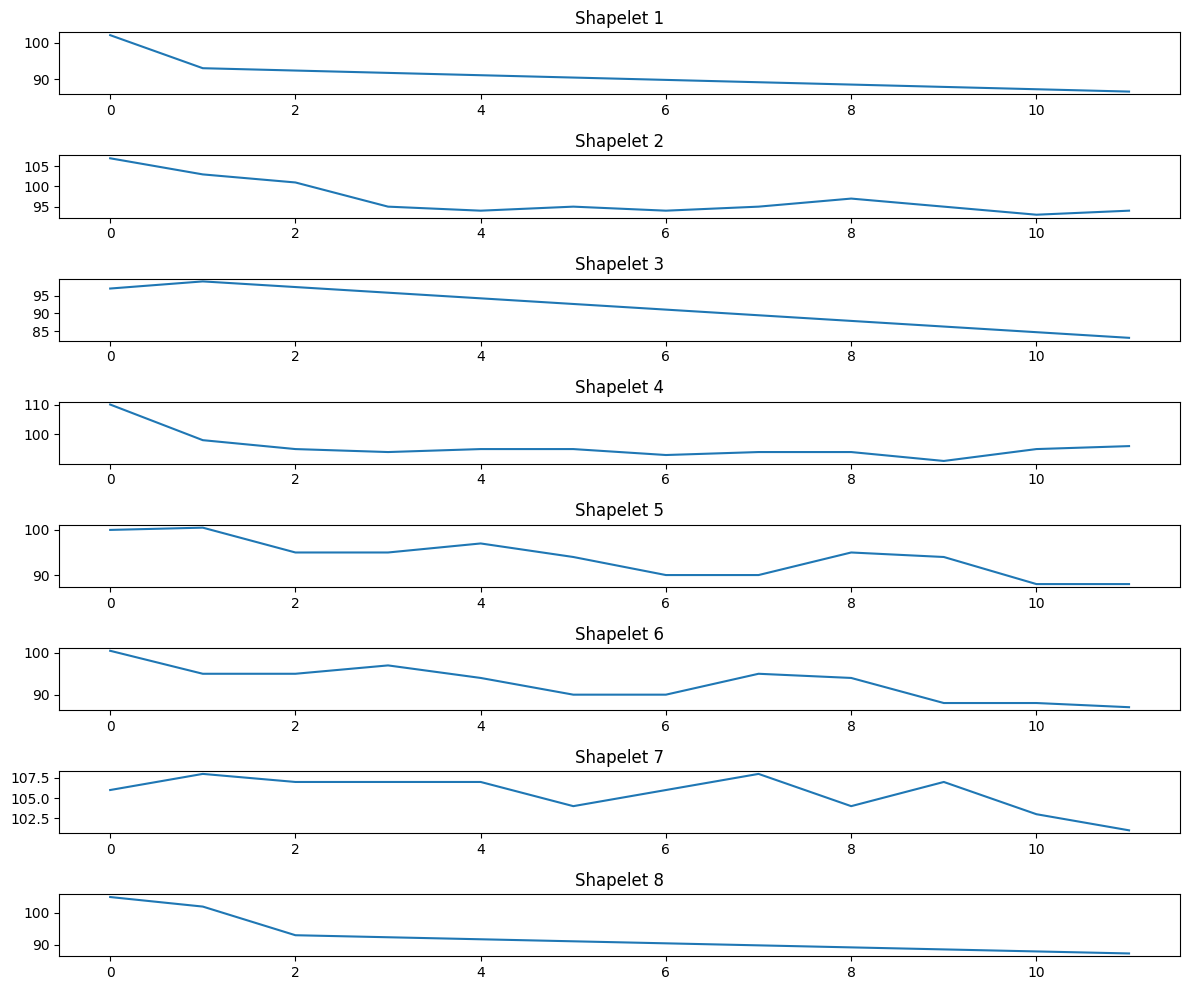

In [19]:
# Plotting the shapelets
fig, axs = plt.subplots(k, 1, figsize=(12, 10))
for i, shapelet in enumerate(shapelets):
    axs[i].plot(shapelet)
    axs[i].set_title(f"Shapelet {i+1}")
plt.tight_layout()
plt.savefig('Shapelets.png')
plt.show()


# Transform the data using shapelets
def transform_data(data, shapelets):
    transformed_data = []
    for entry in data:
        patient = entry["HeartRate"]
        distances = []
        for shapelet in shapelets:
            distance = calculate_dtw_distance(patient, shapelet)
            distances.append(distance)
        transformed_data.append(distances)
    return np.array(transformed_data)

transformed_data = transform_data(data, shapelets)

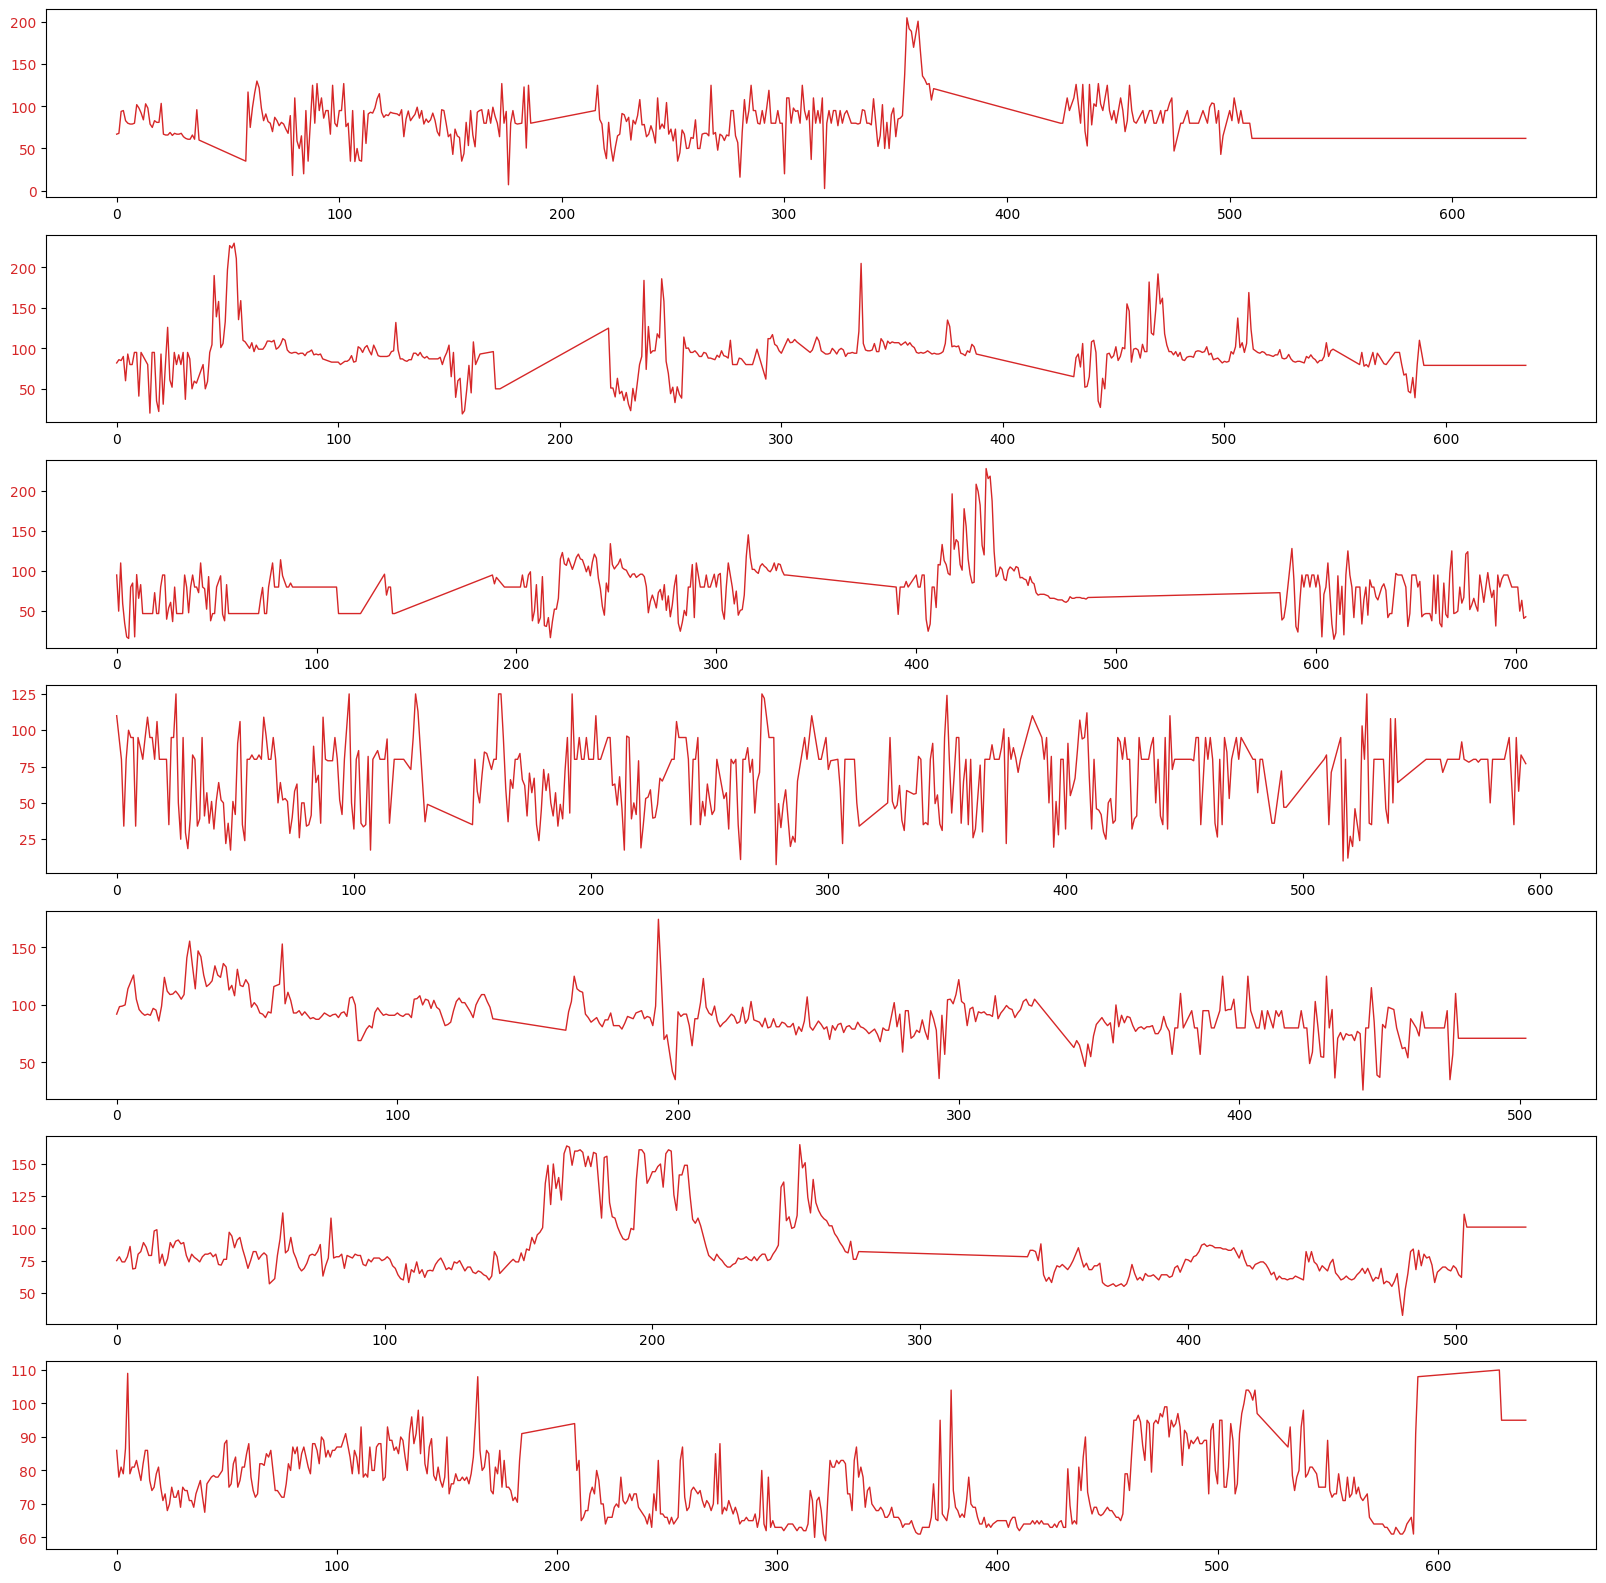

In [21]:
# Print the heart rates for patients
allPatients_plot = [Pat1_d1_resampled, Pat1_d2_resampled, Pat1_d3_resampled, Pat1_d4_resampled, Pat2_d11_resampled 
,Pat2_d2_resampled 
,Pat2_d31_resampled 
,Pat2_d32_resampled 
,Pat2_d41_resampled 
,Pat2_d42_resampled,Pat4_d11_resampled 
,Pat4_d12_resampled 
,Pat4_d2_resampled 
,Pat4_d3_resampled,Pat4_d41_resampled,
Pat5_d12_resampled, 
Pat5_d21_resampled,
Pat5_d22_resampled,
Pat5_d3_resampled,
Pat5_d4_resampled,
Pat6_d21_resampled,
Pat6_d22_resampled,
Pat6_d3_resample,
Pat6_d4_resample,
Pat7_d1_resampled,
Pat7_d2_resampled,
Pat7_d4_resampled,
Pat8_d1_resampled,
Pat8_d2_resampled,
Pat8_d3_resampled,
Pat8_d4_resampled,]

allPatients_plot = [
Pat1, Pat2 , Pat4 , Pat5, Pat6, Pat7, Pat8
]

fig, axes = plt.subplots(nrows=len(allPatients_plot), ncols=1, figsize=(20, 20))

for i, patient in enumerate(allPatients_plot):
    
    color = 'tab:red'
    ax1 = axes[i]
    ax1.plot(patient, color=color, linewidth=1)

    ax1.tick_params(axis='y', labelcolor=color)
plt.savefig('HeartRates.png')
plt.show()


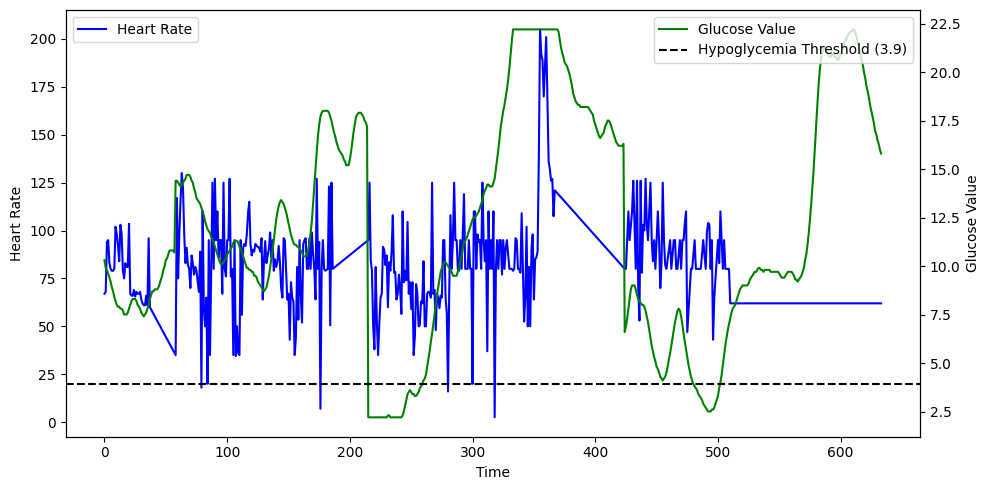

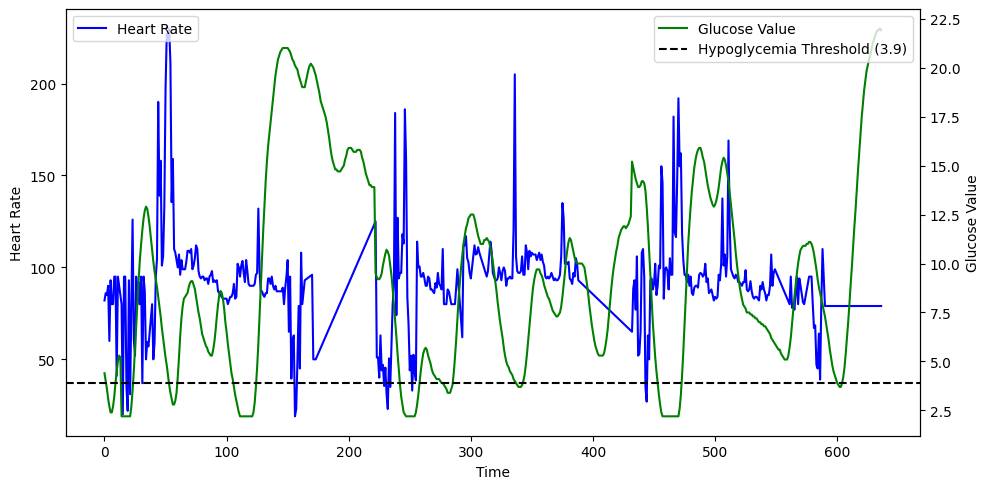

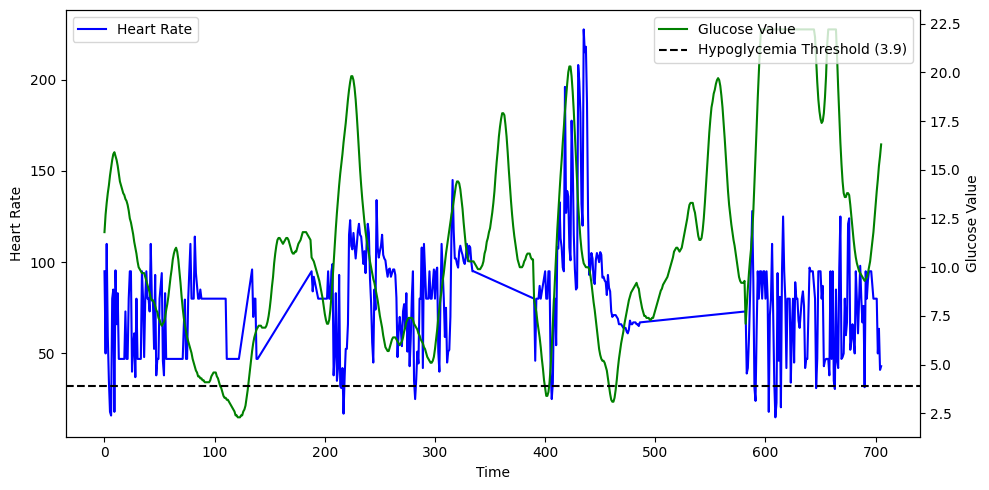

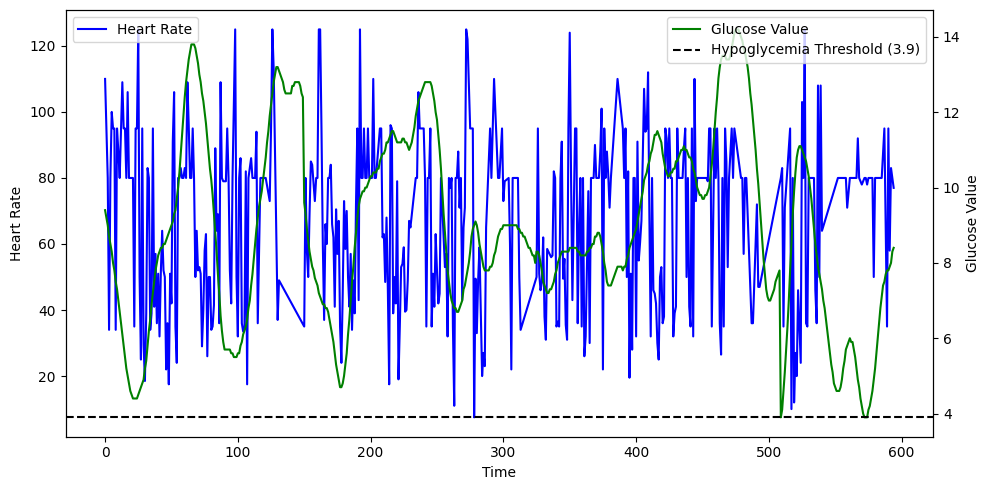

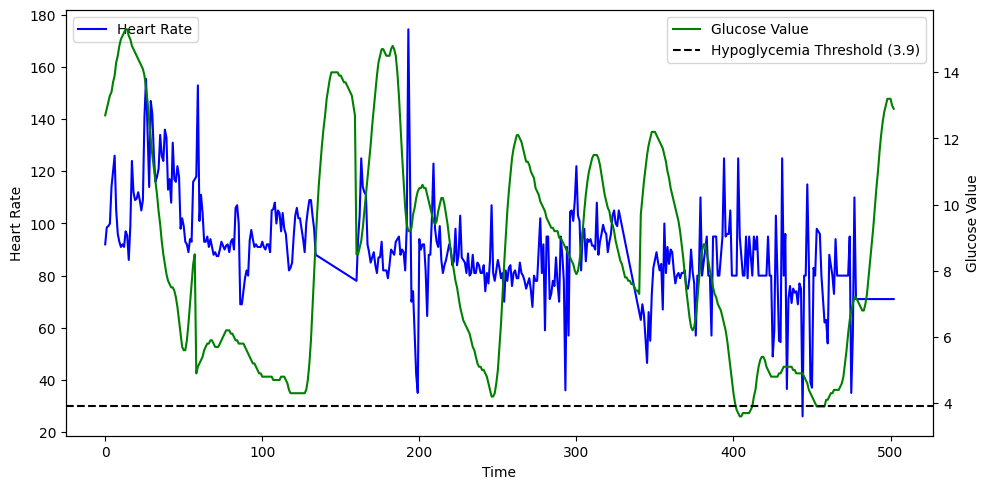

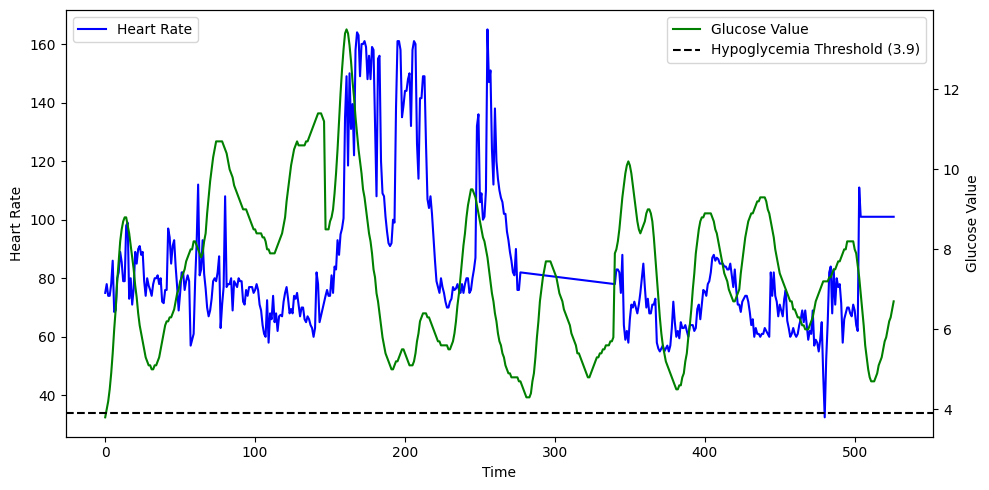

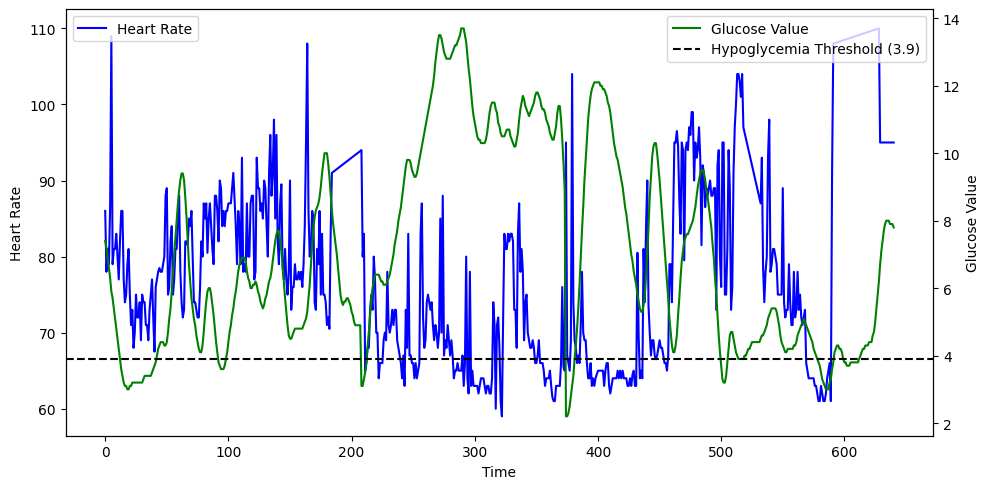

In [23]:
import matplotlib.pyplot as plt

allPatients_plot = [
    Pat1, Pat2, Pat4, Pat5, Pat6, Pat7, Pat8
]
allGlucose_plot = [
    Pat1_l, Pat2_l, Pat4_l, Pat5_l, Pat6_l, Pat7_l, Pat8_l
]

# Plotparameter
threshold = 3.9  # Threshold for Hypoglycemia

for i, (heart_rates, glucose_values) in enumerate(zip(allPatients_plot, allGlucose_plot)):
    fig, ax1 = plt.subplots(figsize=(10, 5)) 

    # Plot Herzraten
    ax1.plot(heart_rates, label="Heart Rate", color='b')
    ax1.set_ylabel('Heart Rate')
    ax1.set_xlabel('Time')
    ax1.legend(loc='upper left')

    ax2 = ax1.twinx()  # Second Y-Axis for the second Plot

    # Plot Glucose values
    ax2.plot(glucose_values, label="Glucose Value", color='g')
    ax2.axhline(y=threshold, color='k', linestyle='--', label=f'Hypoglycemia Threshold ({threshold})')
    ax2.set_ylabel('Glucose Value')
    ax2.legend(loc='upper right')

    plt.tight_layout()
    filename = f'Patient_{i + 1}_HeartRates_and_Glucose.png'
    plt.savefig(filename)
    plt.show()


In [22]:
# existing patient data
patients = [Pat1, Pat2, Pat4, Pat5, Pat6]
patient_labels = [Pat1_labels, Pat2_labels, Pat4_labels, Pat5_labels, Pat6_labels]

# Create a list to hold patient data
data = []

# Loop over the patients starting from i=1
for i, (patient, labels) in enumerate(zip(patients, patient_labels), start=1):
    patient_data = {
        "ID": i,
        "HeartRate": patient,
        "Labels": labels
    }
    data.append(patient_data)

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(data)

# Print the first entry of the DataFrame
print(df.iloc[0])

ID                                                           1
HeartRate    [[67.0], [68.0], [94.0], [95.0], [83.0], [80.0...
Labels       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: 0, dtype: object


In [23]:
# Assuming having lists: data, shapelets
num_shapelets = len(shapelets)

# Create an empty array to store shapelet similarities
shapelet_similarities_data = np.zeros((len(data), num_shapelets))

# Define a function to calculate DTW distance between two sequences
def calculate_dtw_distance(sequence1, sequence2):
    distance, _ = fastdtw(sequence1, sequence2)
    return distance

# Iterate through the data dictionary
for i, entry in enumerate(data):
    patient_hr = entry["HeartRate"]  # Access the "HeartRate" key in the entry
    for j, shapelet in enumerate(shapelets):
        # Calculate DTW distance between the patient's heart rate data and the shapelet
        distance = calculate_dtw_distance(patient_hr, shapelet)
        shapelet_similarities_data[i, j] = distance


In [24]:
print(len(shapelet_similarities_data))

5


In [25]:
# Define a function to create sequences
def create_sequences(X_list, y_list, seq_length=8, step_size=1):
    X_seq, y_label = [], []
    for X, y in zip(X_list, y_list):
        for i in range(0, len(X) - seq_length + 1, step_size):
            feature = X[i:(i + seq_length)]
            label = y[i + seq_length - 1]
            X_seq.append(feature)
            y_label.append(label)
    return X_seq, y_label

# Define the sequence length and step size
seq_length = 8
step_size = 1

# Initialize a list to store all training data
all_train_data = []

# Initialize a list to store all testing data
all_test_data = []

# Iterate through the rows of the DataFrame
for index, row in df.iterrows():
    patient_id = row["ID"]
    heart_rate = row["HeartRate"]
    labels = [row["Labels"]]  # Convert the integer label to a list
    
    # Ensure that heart_rate is a list of sequences
    if not isinstance(heart_rate[0], list):
        heart_rate = [heart_rate]  # Convert a single sequence to a list
    
    X_list = heart_rate  # Use heart_rate as X_list
    
    # Apply the create_sequences() function to format the data
    X_formatted, y_formatted = create_sequences(X_list, labels, seq_length=seq_length, step_size=step_size)
    
    # One-hot encode the labels
    label_encoder = LabelEncoder()
    y_formatted_encoded = label_encoder.fit_transform(y_formatted)
    
    # Initialize a list to store similarities for this patient
    patient_sequence_similarities = []
    
    for patient_sequences in X_formatted:
        sequence_similarities = []  # Store similarities for this sequence
        
        for sequence in patient_sequences:
            shapelet_similarities = []  # Store shapelet similarities for this sequence
            
            for shapelet in shapelets:  # Assuming you have a list of shapelets
                distance, _ = fastdtw(sequence, shapelet)
                shapelet_similarities.append(distance)
            
            sequence_similarities.append(shapelet_similarities)
        
        patient_sequence_similarities.append(sequence_similarities)
    
    # Append the formatted data for this patient to the respective list
    if patient_id == 8:
        all_test_data.append((patient_id, X_formatted, y_formatted_encoded, patient_sequence_similarities))
    else:
        all_train_data.append((patient_id, X_formatted, y_formatted_encoded, patient_sequence_similarities))

In [26]:
# existing patient test data
patient_8 = [Pat8]
patient_labels_8 = [Pat8_labels]

# Create a list to hold patient data
data = []

# Loop over the patients starting from i=1
for i, (patient, labels) in enumerate(zip(patient_8, patient_labels_8), start=8):
    patient_data = {
        "ID": i,
        "HeartRate": patient,
        "Labels": labels
    }
    data.append(patient_data)

# Create a DataFrame from the list of dictionaries
df_Pat8 = pd.DataFrame(data)

# Print the first entry of the DataFrame
print(df_Pat8.iloc[0])

ID                                                           8
HeartRate    [[86.0], [78.0], [81.0], [79.0], [86.5], [109....
Labels       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...
Name: 0, dtype: object


In [27]:
# Define a function to create sequences
def create_sequences(X_list, y_list, seq_length=8, step_size=1):
    X_seq, y_label = [], []
    for X, y in zip(X_list, y_list):
        for i in range(0, len(X) - seq_length + 1, step_size):
            feature = X[i:(i + seq_length)]
            label = y[i + seq_length - 1]
            X_seq.append(feature)
            y_label.append(label)
    return X_seq, y_label

# Define the sequence length and step size
seq_length = 8
step_size = 1

# Initialize a list to store test sequence data
test_sequence_data_Pat8 = []

# Initialize a list to store all data (sequences and similarities) for all test patients
all_test_patient_data = []

# Iterate through the rows of the DataFrame (assuming df_Pat8 contains your test data)
for index, row in df_Pat8.iterrows():
    patient_id = row["ID"]
    heart_rate = row["HeartRate"]
    labels = [row["Labels"]]  # Convert the integer label to a list
    
    # Ensure that heart_rate is a list of sequences
    if not isinstance(heart_rate[0], list):
        heart_rate = [heart_rate]  # Convert a single sequence to a list
    
    X_list = heart_rate  # Use heart_rate as X_list
    
    # Apply the create_sequences() function to format the data
    X_formatted, y_formatted = create_sequences(X_list, labels, seq_length=seq_length, step_size=step_size)
    
    # One-hot encode the labels
    label_encoder = LabelEncoder()
    y_formatted_encoded = label_encoder.fit_transform(y_formatted)
    
    # Initialize a list to store similarities for this patient
    patient_sequence_similarities = []
    
    for patient_sequences in X_formatted:
        sequence_similarities = []  # Store similarities for this sequence
        
        for sequence in patient_sequences:
            shapelet_similarities = []  # Store shapelet similarities for this sequence
            
            for shapelet in shapelets:  # Assuming you have a list of shapelets
                distance, _ = fastdtw(sequence, shapelet)
                shapelet_similarities.append(distance)
            
            sequence_similarities.append(shapelet_similarities)
        
        patient_sequence_similarities.append(sequence_similarities)
    
    # Append the formatted data for this patient to the respective list
    test_sequence_data_Pat8.append((patient_id, X_formatted,  patient_sequence_similarities, y_formatted_encoded))
    
    # Append all data (sequences and similarities) for this patient to the all_test_patient_data list
    all_test_patient_data.append((patient_id, X_formatted, patient_sequence_similarities, y_formatted_encoded))


In [28]:
print(all_test_patient_data)

[(8, [array([[ 86. ],
       [ 78. ],
       [ 81. ],
       [ 79. ],
       [ 86.5],
       [109. ],
       [ 79. ],
       [ 81. ]]), array([[ 78. ],
       [ 81. ],
       [ 79. ],
       [ 86.5],
       [109. ],
       [ 79. ],
       [ 81. ],
       [ 81. ]]), array([[ 81. ],
       [ 79. ],
       [ 86.5],
       [109. ],
       [ 79. ],
       [ 81. ],
       [ 81. ],
       [ 83. ]]), array([[ 79. ],
       [ 86.5],
       [109. ],
       [ 79. ],
       [ 81. ],
       [ 81. ],
       [ 83. ],
       [ 80. ]]), array([[ 86.5],
       [109. ],
       [ 79. ],
       [ 81. ],
       [ 81. ],
       [ 83. ],
       [ 80. ],
       [ 77. ]]), array([[109.],
       [ 79.],
       [ 81.],
       [ 81.],
       [ 83.],
       [ 80.],
       [ 77.],
       [ 82.]]), array([[79.],
       [81.],
       [81.],
       [83.],
       [80.],
       [77.],
       [82.],
       [86.]]), array([[81.],
       [81.],
       [83.],
       [80.],
       [77.],
       [82.],
       [86.],
       [86

In [29]:
# Create a list of column headers for your DataFrame
column_headers = ["Patient_ID", "Sequence", "Similarity", "Label"]

# Create an empty list to store the dictionaries for each row
data = []

# Populate the list with dictionaries for each row
for patient_id, X_formatted, y_formatted, similarities in all_train_data:
    for sequence, similarity, label in zip(X_formatted, similarities, y_formatted):
        data.append({
            "Patient_ID": patient_id,
            "Sequence": sequence,
            "Similarity": similarity,
            "Label": label
        })
sequence.flatten()
similarity = np.array(similarity)
# Create the DataFrame from the list of dictionaries
train_df = pd.DataFrame(data, columns=column_headers)
train_df.head()

,Patient_ID,Sequence,Similarity,Label
0,1,"[[67.0], [68.0], [94.0], [95.0], [83.0], [80.0...","[[285.9999999999998, 359.0, 294.9166666666668,...",0
1,1,"[[68.0], [94.0], [95.0], [83.0], [80.0], [79.0...","[[273.9999999999998, 347.0, 282.9166666666668,...",0
2,1,"[[94.0], [95.0], [83.0], [80.0], [79.0], [79.0...","[[54.00000000000021, 37.0, 56.083333333333286,...",0
3,1,"[[95.0], [83.0], [80.0], [79.0], [79.0], [80.0...","[[64.00000000000021, 33.0, 59.58333333333326, ...",0
4,1,"[[83.0], [80.0], [79.0], [79.0], [80.0], [102....","[[93.99999999999979, 167.0, 102.91666666666677...",0


In [30]:
for entry in train_df[:5]:  # Print the first 5 entries as an example
    print(similarity)

[[238.         311.         246.91666667 298.         274.5
  261.5        416.         256.36363636]
 [238.         311.         246.91666667 298.         274.5
  261.5        416.         256.36363636]
 [238.         311.         246.91666667 298.         274.5
  261.5        416.         256.36363636]
 [238.         311.         246.91666667 298.         274.5
  261.5        416.         256.36363636]
 [238.         311.         246.91666667 298.         274.5
  261.5        416.         256.36363636]
 [238.         311.         246.91666667 298.         274.5
  261.5        416.         256.36363636]
 [238.         311.         246.91666667 298.         274.5
  261.5        416.         256.36363636]
 [238.         311.         246.91666667 298.         274.5
  261.5        416.         256.36363636]]
[[238.         311.         246.91666667 298.         274.5
  261.5        416.         256.36363636]
 [238.         311.         246.91666667 298.         274.5
  261.5        416.  

In [32]:
# Convert the list of dictionaries into a DataFrame
data_df = pd.DataFrame(data)

# Initialize your classifier (you can adjust parameters as needed)
classifier = SVC()

# Flatten the arrays of arrays in the 'Similarity' column
X_similarities = [np.concatenate(similarity) for similarity in data_df['Similarity']]
y = data_df['Label']

# Train the classifier on similarities
classifier.fit(X_similarities, y)
print("Classifier for Similarities:", classifier)
for entry in X_similarities[:5]:  # Print the first 5 entries as an example
    print(entry)

Classifier for Similarities: SVC()
[286.         359.         294.91666667 346.         322.5
 309.5        464.         304.36363636 274.         347.
 282.91666667 334.         310.5        297.5        452.
 292.36363636  54.          37.          56.08333333  30.
  38.5         39.5        140.          57.63636364  64.
  33.          59.58333333  28.          38.5         41.5
 128.          65.63636364  94.         167.         102.91666667
 154.         130.5        117.5        272.         112.36363636
 130.         203.         138.91666667 190.         166.5
 153.5        308.         148.36363636 142.         215.
 150.91666667 202.         178.5        165.5        320.
 160.36363636 142.         215.         150.91666667 202.
 178.5        165.5        320.         160.36363636]
[274.         347.         282.91666667 334.         310.5
 297.5        452.         292.36363636  54.          37.
  56.08333333  30.          38.5         39.5        140.
  57.63636364  64.   

In [34]:
# Create an empty list to store the dictionaries for each row in the test data
test_data = []

# Populate the list with dictionaries for each row in the test data
for test_patient_id, test_sequences, test_similarities, test_labels in all_test_patient_data:
    for test_sequence, test_similarity, test_label in zip(test_sequences, test_similarities, test_labels):
        test_data.append({
            "Patient_ID": test_patient_id,
            "Sequence": test_sequence,
            "Similarity": test_similarity,
            "Label": test_label
        })

# Create the DataFrame from the list of dictionaries for test data
test_df = pd.DataFrame(test_data, columns=column_headers)
test_df.head()


,Patient_ID,Sequence,Similarity,Label
0,8,"[[86.0], [78.0], [81.0], [79.0], [86.5], [109....","[[57.99999999999979, 131.0, 75.08333333333343,...",0
1,8,"[[78.0], [81.0], [79.0], [86.5], [109.0], [79....","[[153.9999999999998, 227.0, 162.91666666666674...",0
2,8,"[[81.0], [79.0], [86.5], [109.0], [79.0], [81....","[[117.99999999999979, 191.0, 126.9166666666667...",0
3,8,"[[79.0], [86.5], [109.0], [79.0], [81.0], [81....","[[141.9999999999998, 215.0, 150.91666666666674...",0
4,8,"[[86.5], [109.0], [79.0], [81.0], [81.0], [83....","[[51.99999999999979, 125.0, 71.41666666666674,...",0


Classifier for Similarities: SVC()
Accuracy: 0.67
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       545
           1       0.00      0.00      0.00       272

    accuracy                           0.67       817
   macro avg       0.33      0.50      0.40       817
weighted avg       0.44      0.67      0.53       817



C:\Users\Daniel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

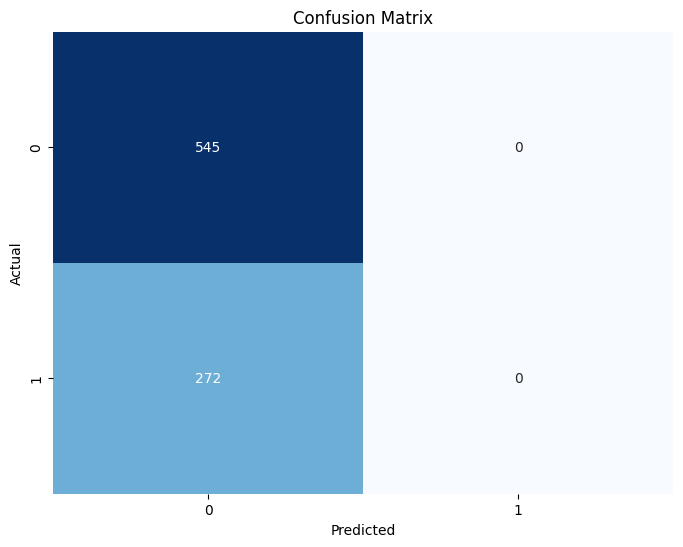

In [35]:
# Convert the list of dictionaries into a DataFrame
data_df = pd.DataFrame(data)

# Initialize your classifier (you can adjust parameters as needed)
classifier = SVC()

# Flatten the arrays of arrays in the 'Similarity' column
X_similarities = [np.concatenate(similarity) for similarity in data_df['Similarity']]
y = data_df['Label']

# Train the classifier on similarities
classifier.fit(X_similarities, y)
print("Classifier for Similarities:", classifier)

# Assuming having a list of dictionaries named 'test_data' with keys 'Sequence', 'Similarity', and 'Label'

# Combine similarities and flatten them for the entire test dataset
X_test = [np.concatenate(similarity) for similarity in [entry['Similarity'] for entry in test_data]]
y_test = [entry['Label'] for entry in test_data]

# Apply SMOTE to balance the classes
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_test_resampled, y_test_resampled = smote.fit_resample(X_test, y_test)

# Make predictions on the test data using the trained classifier
y_pred = classifier.predict(X_test_resampled)

# Calculate accuracy
accuracy = accuracy_score(y_test_resampled, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
report = classification_report(y_test_resampled, y_pred)
print(report)

# Create a confusion matrix
cm = confusion_matrix(y_test_resampled, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('SVM Confusion matrix.png')
plt.show()


Classifier for Similarities: SVC()
Accuracy: 0.56
              precision    recall  f1-score   support

           0       0.85      0.60      0.70       545
           1       0.12      0.35      0.18        89

    accuracy                           0.56       634
   macro avg       0.49      0.47      0.44       634
weighted avg       0.75      0.56      0.63       634



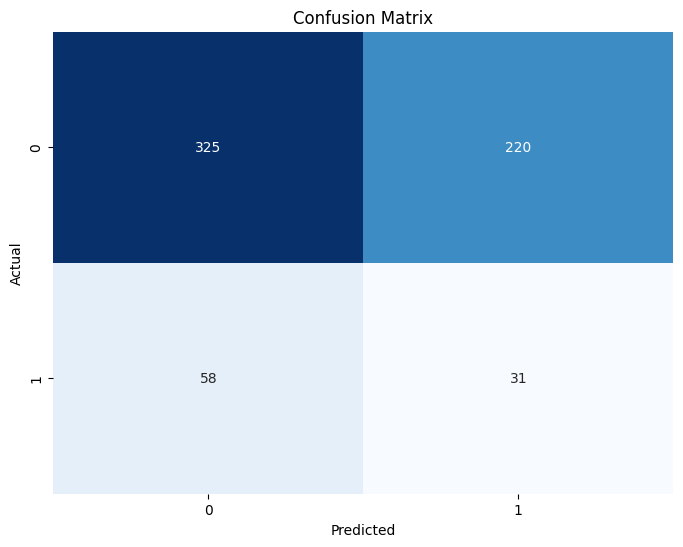

In [41]:
# Import necessary libraries
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the list of dictionaries into a DataFrame
data_df = pd.DataFrame(data)

# Initialize your classifier (you can adjust parameters as needed)
classifier = SVC()

# Flatten the arrays of arrays in the 'Similarity' column
X_similarities = [np.concatenate(similarity) for similarity in data_df['Similarity']]
y = data_df['Label']

# Apply SMOTE to balance the classes in the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_similarities, y)

# Train the classifier on the resampled data
classifier.fit(X_resampled, y_resampled)
print("Classifier for Similarities:", classifier)

# Assuming you have a list of dictionaries named 'test_data' with keys 'Sequence', 'Similarity', and 'Label'

# Combine similarities and flatten them for the entire test dataset
X_test = [np.concatenate(similarity) for similarity in [entry['Similarity'] for entry in test_data]]
y_test = [entry['Label'] for entry in test_data]

# Make predictions on the test data using the trained classifier
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('SVM Confusion matrix.png')
plt.show()


Epoch 1/10
76/76 [==============================] - 0s 3ms/step - loss: 8.7336 - accuracy: 0.8577 - val_loss: 0.7016 - val_accuracy: 0.9638
Epoch 2/10
76/76 [==============================] - 0s 2ms/step - loss: 1.0638 - accuracy: 0.8660 - val_loss: 0.4291 - val_accuracy: 0.8816
Epoch 3/10
76/76 [==============================] - 0s 2ms/step - loss: 1.1840 - accuracy: 0.8549 - val_loss: 0.8338 - val_accuracy: 0.8026
Epoch 4/10
76/76 [==============================] - 0s 2ms/step - loss: 0.7730 - accuracy: 0.8725 - val_loss: 0.2790 - val_accuracy: 0.9556
Epoch 5/10
76/76 [==============================] - 0s 2ms/step - loss: 0.7660 - accuracy: 0.8746 - val_loss: 0.3137 - val_accuracy: 0.9589
Epoch 6/10
76/76 [==============================] - 0s 2ms/step - loss: 0.6403 - accuracy: 0.8808 - val_loss: 0.2964 - val_accuracy: 0.9622
Epoch 7/10
76/76 [==============================] - 0s 2ms/step - loss: 0.5992 - accuracy: 0.8865 - val_loss: 0.3586 - val_accuracy: 0.8849
Epoch 8/10
76/76 [==

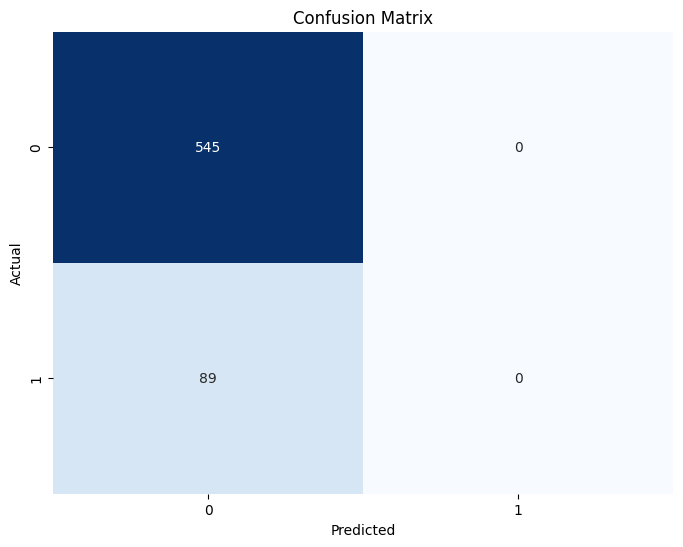

Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       545
           1       0.00      0.00      0.00        89

    accuracy                           0.86       634
   macro avg       0.43      0.50      0.46       634
weighted avg       0.74      0.86      0.79       634

X_train shape: (3040, 8, 8, 1)
X_test shape: (634, 8, 8, 1)
X_train:
[[[[286.        ]
   [359.        ]
   [294.91666667]
   [346.        ]
   [322.5       ]
   [309.5       ]
   [464.        ]
   [304.36363636]]

  [[274.        ]
   [347.        ]
   [282.91666667]
   [334.        ]
   [310.5       ]
   [297.5       ]
   [452.        ]
   [292.36363636]]

  [[ 54.        ]
   [ 37.        ]
   [ 56.08333333]
   [ 30.        ]
   [ 38.5       ]
   [ 39.5       ]
   [140.        ]
   [ 57.63636364]]

  [[ 64.        ]
   [ 33.        ]
   [ 59.58333333]
   [ 28.        ]
   [ 38.5       ]
   [ 41.5       ]
   [128.        ]
  

C:\Users\Daniel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [44]:
# Extract the similarity data and labels for training and testing
X_train_similarities = np.array([np.array(similarity) for similarity in train_df['Similarity']])
y_train = train_df['Label']

X_test_similarities = np.array([np.array(similarity) for similarity in test_df['Similarity']])
y_test = test_df['Label']

# Encode the labels (if they are strings)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Reshape the data for CNN input (assuming each similarity entry contains 8 values)
input_shape = (8, 8, 1)  # 8x8 grid, 1 channel (grayscale)
X_train_similarities = X_train_similarities.reshape(-1, *input_shape)
X_test_similarities = X_test_similarities.reshape(-1, *input_shape)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification, change if needed

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_similarities, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
accuracy = model.evaluate(X_test_similarities, y_test)[1]
print(f"Test accuracy: {accuracy * 100:.2f}%")

# Make predictions
y_pred = model.predict(X_test_similarities)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('CNN confusion matrix no smote.png')
plt.show()

threshold = 0.5  # You can adjust this threshold if needed
y_pred_binary = (y_pred > threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
report = classification_report(y_test, y_pred_binary)
print("Classification Report:")
print(report)

# Printing the shape of the training and testing data
print("X_train shape:", X_train_similarities.shape)
print("X_test shape:", X_test_similarities.shape)

# Printing the first few entries in the training data
print("X_train:")
print(X_train_similarities[:5])  # Change the number (5) to view more or fewer entries

# Printing the first few entries in the testing data
print("X_test:")
print(X_test_similarities[:5])  # Change the number (5) to view more or fewer entries


Epoch 1/50
141/141 [==============================] - 1s 2ms/step - loss: 4.8680 - accuracy: 0.5370 - val_loss: 2.4466 - val_accuracy: 0.4504
Epoch 2/50
141/141 [==============================] - 0s 2ms/step - loss: 2.8123 - accuracy: 0.5796 - val_loss: 0.5089 - val_accuracy: 0.8972
Epoch 3/50
141/141 [==============================] - 0s 2ms/step - loss: 1.6714 - accuracy: 0.6349 - val_loss: 5.8395 - val_accuracy: 0.0665
Epoch 4/50
141/141 [==============================] - 0s 2ms/step - loss: 1.4597 - accuracy: 0.6595 - val_loss: 1.0141 - val_accuracy: 0.5098
Epoch 5/50
141/141 [==============================] - 0s 2ms/step - loss: 1.0397 - accuracy: 0.6750 - val_loss: 1.6342 - val_accuracy: 0.4619
Epoch 6/50
141/141 [==============================] - 0s 2ms/step - loss: 0.8522 - accuracy: 0.7001 - val_loss: 0.4482 - val_accuracy: 0.8333
Epoch 7/50
141/141 [==============================] - 0s 2ms/step - loss: 0.8490 - accuracy: 0.7070 - val_loss: 1.4397 - val_accuracy: 0.3466
Epoch 

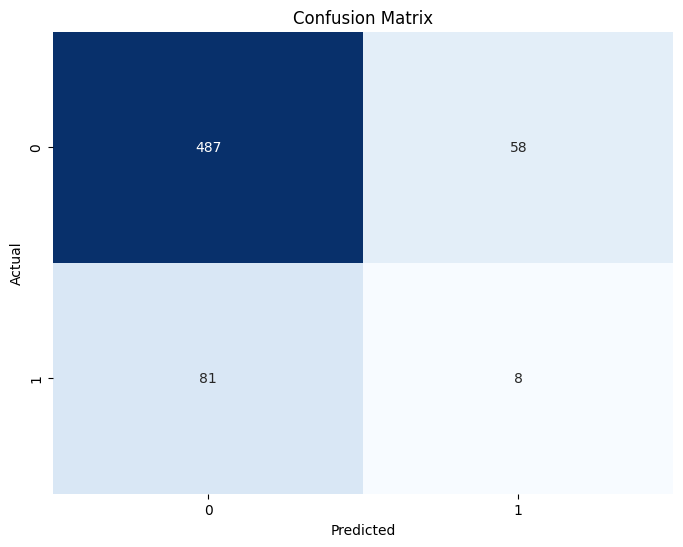

X_train shape: (5636, 8, 8, 1)
X_test shape: (634, 8, 8, 1)
Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       545
           1       0.12      0.09      0.10        89

    accuracy                           0.78       634
   macro avg       0.49      0.49      0.49       634
weighted avg       0.75      0.78      0.77       634

X_train:
[[[[286.        ]
   [359.        ]
   [294.91666667]
   [346.        ]
   [322.5       ]
   [309.5       ]
   [464.        ]
   [304.36363636]]

  [[274.        ]
   [347.        ]
   [282.91666667]
   [334.        ]
   [310.5       ]
   [297.5       ]
   [452.        ]
   [292.36363636]]

  [[ 54.        ]
   [ 37.        ]
   [ 56.08333333]
   [ 30.        ]
   [ 38.5       ]
   [ 39.5       ]
   [140.        ]
   [ 57.63636364]]

  [[ 64.        ]
   [ 33.        ]
   [ 59.58333333]
   [ 28.        ]
   [ 38.5       ]
   [ 41.5       ]
   [128.        ]
  

In [51]:
# Extract the similarity data and labels for training and testing
X_train_similarities = np.array([np.array(similarity) for similarity in train_df['Similarity']])
y_train = train_df['Label']

X_test_similarities = np.array([np.array(similarity) for similarity in test_df['Similarity']])
y_test = test_df['Label']

# Encode the labels (if they are strings)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Reshape the data for CNN input (assuming each similarity entry contains 8 values)
input_shape = (8, 8, 1)  # 8x8 grid, 1 channel (grayscale)
X_train_similarities = X_train_similarities.reshape(-1, *input_shape)
X_test_similarities = X_test_similarities.reshape(-1, *input_shape)

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_similarities_resampled, y_train_resampled = smote.fit_resample(X_train_similarities.reshape(-1, 64), y_train)

# Reshape the resampled data back to the original shape
X_train_similarities_resampled = X_train_similarities_resampled.reshape(-1, *input_shape)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification, change if needed

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_similarities_resampled, y_train_resampled, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
accuracy = model.evaluate(X_test_similarities, y_test)[1]
print(f"Test accuracy: {accuracy * 100:.2f}%")

# Make predictions
y_pred = model.predict(X_test_similarities)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('CNN confusion matrix with smote.png')
plt.show()

# Printing the shape of the training and testing data
print("X_train shape:", X_train_similarities_resampled.shape)
print("X_test shape:", X_test_similarities.shape)


threshold = 0.5  # You can adjust this threshold if needed
y_pred_binary = (y_pred > threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
report = classification_report(y_test, y_pred_binary)
print("Classification Report:")
print(report)


# Printing the first few entries in the training data
print("X_train:")
print(X_train_similarities_resampled[:5])  # Change the number (5) to view more or fewer entries

# Printing the first few entries in the testing data
print("X_test:")
print(X_test_similarities[:5])  # Change the number (5) to view more or fewer entries


C:\Users\Daniel\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
71/71 [==============================] - 1s 4ms/step - loss: 6.6316 - accuracy: 0.5333 - val_loss: 2.3673 - val_accuracy: 0.1640
Epoch 2/100
71/71 [==============================] - 0s 3ms/step - loss: 2.4419 - accuracy: 0.5373 - val_loss: 1.4841 - val_accuracy: 0.1720
Epoch 3/100
71/71 [==============================] - 0s 3ms/step - loss: 1.3348 - accuracy: 0.5590 - val_loss: 1.0252 - val_accuracy: 0.1720
Epoch 4/100
71/71 [==============================] - 0s 3ms/step - loss: 0.9601 - accuracy: 0.5621 - val_loss: 0.8434 - val_accuracy: 0.1826
Epoch 5/100
71/71 [==============================] - 0s 3ms/step - loss: 0.8169 - accuracy: 0.5617 - val_loss: 0.8366 - val_accuracy: 0.0922
Epoch 6/100
71/71 [==============================] - 0s 3ms/step - loss: 0.7277 - accuracy: 0.5918 - val_loss: 0.7927 - val_accuracy: 0.1268
Epoch 7/100
71/71 [==============================] - 0s 3ms/step - loss: 0.7045 - accuracy: 0.6087 - val_loss: 0.8197 - val_accuracy: 0.0851
Epoch 8/100
7

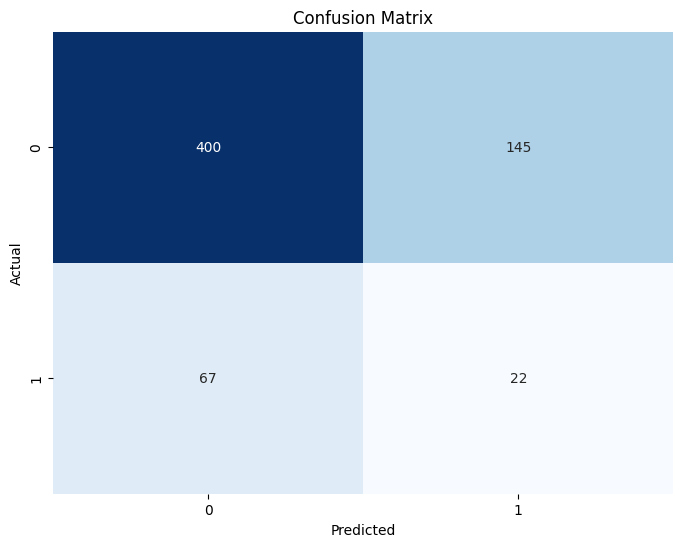

Accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.73      0.79       545
           1       0.13      0.25      0.17        89

    accuracy                           0.67       634
   macro avg       0.49      0.49      0.48       634
weighted avg       0.75      0.67      0.70       634

X_train shape: (5636, 8, 8, 1)
X_test shape: (634, 8, 8, 1)
X_train:
[[[[286.        ]
   [359.        ]
   [294.91666667]
   [346.        ]
   [322.5       ]
   [309.5       ]
   [464.        ]
   [304.36363636]]

  [[274.        ]
   [347.        ]
   [282.91666667]
   [334.        ]
   [310.5       ]
   [297.5       ]
   [452.        ]
   [292.36363636]]

  [[ 54.        ]
   [ 37.        ]
   [ 56.08333333]
   [ 30.        ]
   [ 38.5       ]
   [ 39.5       ]
   [140.        ]
   [ 57.63636364]]

  [[ 64.        ]
   [ 33.        ]
   [ 59.58333333]
   [ 28.        ]
   [ 38.5       ]
   [ 41.5       ]
   [128.        ]
  

In [56]:
# Extract the similarity data and labels for training and testing
X_train_similarities = np.array([np.array(similarity) for similarity in train_df['Similarity']])
y_train = train_df['Label']

X_test_similarities = np.array([np.array(similarity) for similarity in test_df['Similarity']])
y_test = test_df['Label']

# Encode the labels (if they are strings)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Reshape the data for CNN input (assuming each similarity entry contains 8 values)
input_shape = (8, 8, 1)  # 8x8 grid, 1 channel (grayscale)
X_train_similarities = X_train_similarities.reshape(-1, *input_shape)
X_test_similarities = X_test_similarities.reshape(-1, *input_shape)

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_similarities_resampled, y_train_resampled = smote.fit_resample(X_train_similarities.reshape(-1, 64), y_train)

# Reshape the resampled data back to the original shape
X_train_similarities_resampled = X_train_similarities_resampled.reshape(-1, *input_shape)

# Build the CNN model
model = Sequential()

# Convolutional layers
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

# Check if the feature map dimensions are suitable for max-pooling
if model.output_shape[1] >= 2 and model.output_shape[2] >= 2:
    model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

# Check if the feature map dimensions are suitable for max-pooling
if model.output_shape[1] >= 2 and model.output_shape[2] >= 2:
    model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Fully connected layers with dropout for regularization
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model with a lower learning rate for better convergence
from tensorflow.keras.optimizers import Adam
optimizer = Adam(lr=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with more epochs
model.fit(X_train_similarities_resampled, y_train_resampled, epochs=100, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
accuracy = model.evaluate(X_test_similarities, y_test)[1]
print(f"Test accuracy: {accuracy * 100:.2f}%")

# Make predictions
y_pred = model.predict(X_test_similarities)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('CNN 2 layers confusion matrix with smote.png')
plt.show()

threshold = 0.5  # You can adjust this threshold if needed
y_pred_binary = (y_pred > threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
report = classification_report(y_test, y_pred_binary)
print("Classification Report:")
print(report)

# Printing the shape of the training and testing data
print("X_train shape:", X_train_similarities_resampled.shape)
print("X_test shape:", X_test_similarities.shape)

# Printing the first few entries in the training data
print("X_train:")
print(X_train_similarities_resampled[:5])  # Change the number (5) to view more or fewer entries

# Printing the first few entries in the testing data
print("X_test:")
print(X_test_similarities[:5])  # Change the number (5) to view more or fewer entries


Epoch 1/50
177/177 - 1s - loss: 0.7120 - accuracy: 0.5507 - val_loss: 0.6261 - val_accuracy: 0.6782 - lr: 0.0010 - 674ms/epoch - 4ms/step
Epoch 2/50
177/177 - 0s - loss: 0.6597 - accuracy: 0.6088 - val_loss: 0.4990 - val_accuracy: 0.8580 - lr: 9.0000e-04 - 270ms/epoch - 2ms/step
Epoch 3/50
177/177 - 0s - loss: 0.6168 - accuracy: 0.6531 - val_loss: 0.5675 - val_accuracy: 0.8486 - lr: 8.1000e-04 - 265ms/epoch - 1ms/step
Epoch 4/50
177/177 - 0s - loss: 0.5758 - accuracy: 0.6977 - val_loss: 0.5493 - val_accuracy: 0.8281 - lr: 7.2900e-04 - 264ms/epoch - 1ms/step
Epoch 5/50
177/177 - 0s - loss: 0.5303 - accuracy: 0.7289 - val_loss: 0.5264 - val_accuracy: 0.8391 - lr: 6.5610e-04 - 264ms/epoch - 1ms/step
Epoch 6/50
177/177 - 0s - loss: 0.5114 - accuracy: 0.7472 - val_loss: 0.5293 - val_accuracy: 0.8596 - lr: 5.9049e-04 - 262ms/epoch - 1ms/step
Epoch 7/50
177/177 - 0s - loss: 0.4690 - accuracy: 0.7770 - val_loss: 0.5791 - val_accuracy: 0.8517 - lr: 5.3144e-04 - 268ms/epoch - 2ms/step
Epoch 8/50

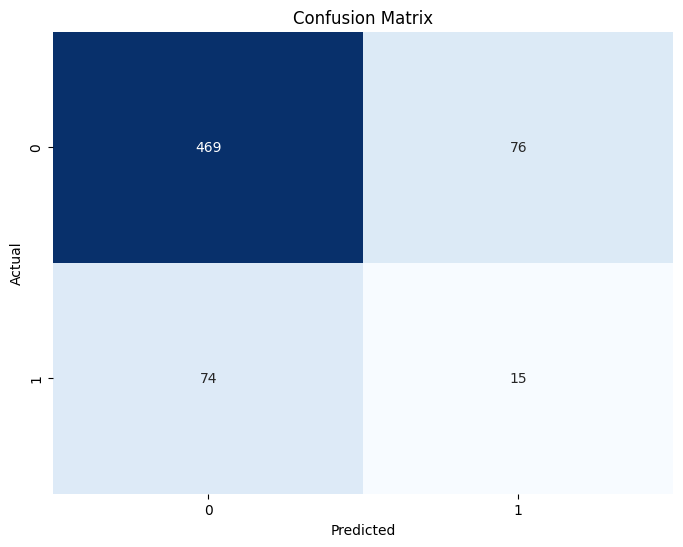

Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       545
           1       0.16      0.17      0.17        89

    accuracy                           0.76       634
   macro avg       0.51      0.51      0.51       634
weighted avg       0.77      0.76      0.76       634



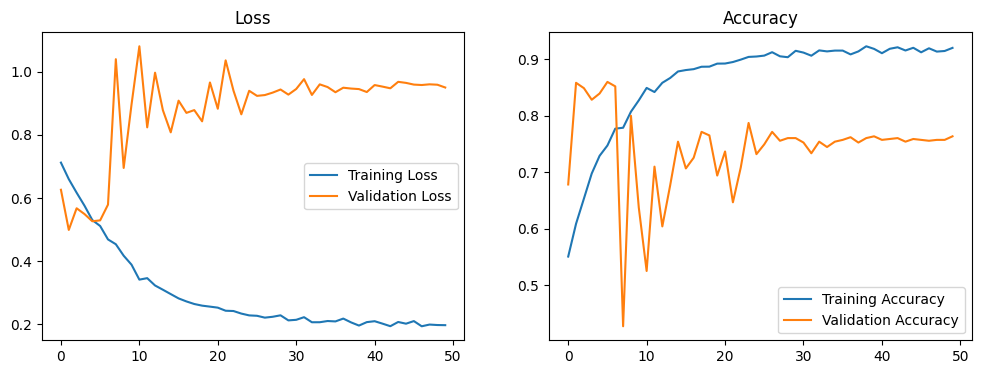

In [59]:
# Extract the similarity data and labels for training and testing
X_train = np.array([np.array(similarity) for similarity in train_df['Similarity']])
y_train = train_df['Label']

X_test = np.array([np.array(similarity) for similarity in test_df['Similarity']])
y_test = test_df['Label']

# Encode the labels (if they are strings)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Reshape the data for CNN input (assuming each similarity entry contains 8 values)
input_shape = (8, 8, 1)  # 8x8 grid, 1 channel (grayscale)
X_train = X_train.reshape(-1, *input_shape)
X_test = X_test.reshape(-1, *input_shape)

# Apply SMOTE to balance the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train.reshape(-1, 64), y_train)

# Reshape the resampled data back to 4D
X_train_resampled = X_train_resampled.reshape(-1, *input_shape)

# Build the CNN model
model = Sequential()

# Add convolutional and pooling layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Add batch normalization layers
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer to reduce overfitting
model.add(Dense(1, activation='sigmoid'))  # Binary classification, change if needed

# Compile the model with learning rate scheduling
initial_learning_rate = 0.001

def lr_scheduler(epoch):
    return initial_learning_rate * 0.9 ** epoch

lr_callback = LearningRateScheduler(lr_scheduler)
optimizer = Adam(learning_rate=initial_learning_rate)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_resampled, y_train_resampled, epochs=50, batch_size=32, 
                    validation_data=(X_test, y_test), callbacks=[lr_callback], verbose=2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Make predictions
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('CNN more layers confusion matrix no smote 2.png')
plt.show()


threshold = 0.5  # You can adjust this threshold if needed
y_pred_binary = (y_pred > threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
report = classification_report(y_test, y_pred_binary)
print("Classification Report:")
print(report)

# Optionally, you can plot the training and validation loss and accuracy over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

In [ ]:
# Extract the similarity data and labels for training and testing
X_train = np.array([np.array(similarity) for similarity in train_df['Similarity']])
y_train = train_df['Label']

X_test = np.array([np.array(similarity) for similarity in test_df['Similarity']])
y_test = test_df['Label']

# Encode the labels (if they are strings)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Reshape the data for CNN input (assuming each similarity entry contains 8 values)
input_shape = (8, 8, 1)  # 8x8 grid, 1 channel (grayscale)
X_train = X_train.reshape(-1, *input_shape)
X_test = X_test.reshape(-1, *input_shape)

# Apply SMOTE to balance the training data
smote = SMOTE(sampling_strategy=1, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train.reshape(-1, 64), y_train)

# Reshape the resampled data back to 4D
X_train_resampled = X_train_resampled.reshape(-1, *input_shape)

# Build the CNN model with zero-padding
model = Sequential()

# Add convolutional and pooling layers with zero-padding
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(MaxPooling2D(pool_size=(1, 1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(1, 1)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(1, 1)))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))



# Add batch normalization layers
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Binary classification, change if needed

# Compile the model with learning rate scheduling
initial_learning_rate = 0.001

def lr_scheduler(epoch):
    return initial_learning_rate * 0.9 ** epoch

lr_callback = LearningRateScheduler(lr_scheduler)
optimizer = Adam(learning_rate=initial_learning_rate)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_resampled, y_train_resampled, epochs=100, batch_size=32, 
                    validation_data=(X_test, y_test), callbacks=[lr_callback], verbose=2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Make predictions
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Optionally, you can plot the training and validation loss and accuracy over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()


Epoch 1/100
177/177 - 10s - loss: 1.1083 - accuracy: 0.5232 - val_loss: 0.6499 - val_accuracy: 0.6798 - lr: 0.0010 - 10s/epoch - 59ms/step
Epoch 2/100
177/177 - 10s - loss: 0.6892 - accuracy: 0.5507 - val_loss: 0.6809 - val_accuracy: 0.4290 - lr: 9.0000e-04 - 10s/epoch - 56ms/step
Epoch 3/100
177/177 - 10s - loss: 0.6882 - accuracy: 0.5435 - val_loss: 0.6859 - val_accuracy: 0.5032 - lr: 8.1000e-04 - 10s/epoch - 55ms/step
Epoch 4/100
177/177 - 10s - loss: 0.6753 - accuracy: 0.5534 - val_loss: 0.7323 - val_accuracy: 0.5852 - lr: 7.2900e-04 - 10s/epoch - 56ms/step
Epoch 5/100
177/177 - 10s - loss: 0.6602 - accuracy: 0.5816 - val_loss: 1.3701 - val_accuracy: 0.8060 - lr: 6.5610e-04 - 10s/epoch - 56ms/step
Epoch 6/100
177/177 - 10s - loss: 0.6259 - accuracy: 0.6010 - val_loss: 1.4162 - val_accuracy: 0.2397 - lr: 5.9049e-04 - 10s/epoch - 58ms/step
Epoch 7/100
177/177 - 10s - loss: 0.6001 - accuracy: 0.6434 - val_loss: 1.4815 - val_accuracy: 0.2161 - lr: 5.3144e-04 - 10s/epoch - 57ms/step
Epo

(3040, 8, 8)
(3040,)
Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       545
           1       0.13      0.17      0.15        89

    accuracy                           0.73       634
   macro avg       0.50      0.50      0.49       634
weighted avg       0.76      0.73      0.74       634



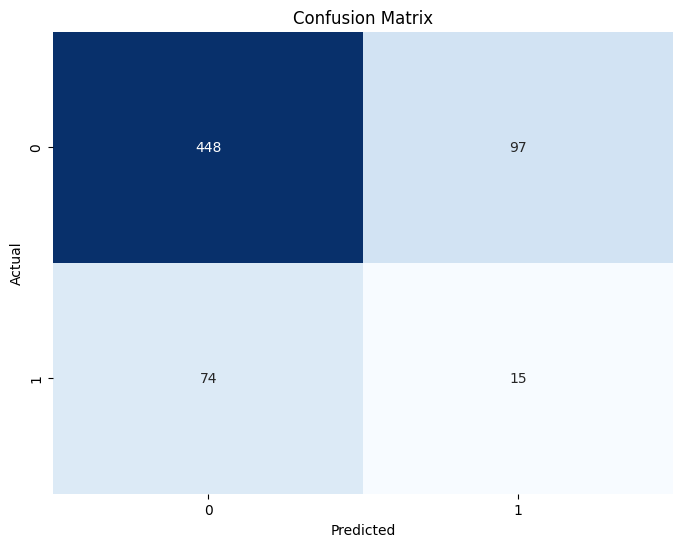

In [38]:
# Extract the sequence data and labels for training and testing
X_train = np.array([np.array(sequence) for sequence in train_df['Similarity']])
y_train = train_df['Label']

X_test = np.array([np.array(sequence) for sequence in test_df['Similarity']])
y_test = test_df['Label']

print(X_train.shape)
print(y_train.shape)

class_ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Passen Sie die Gewichtung basierend auf dem Verhältnis an
class_weights = {0: 1, 1: class_ratio}
# Flatten the sequences in the training data
X_train_flat = [seq.flatten() for seq in X_train]

# Apply SMOTE to balance the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_flat, y_train)

# Build the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weights)

# Train the classifier on the resampled data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Flatten the sequences in the test data
X_test_flat = [seq.flatten() for seq in X_test]

# Make predictions on the test data using the trained classifier
y_pred_proba = rf_classifier.predict_proba(X_test_flat)

threshold = 0.4
y_pred = (y_pred_proba[:, 1] > threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('RFC confusion matrix with smote.png')

plt.show()

with open('y_test.txt', 'w') as file:
    for label in y_test:
        file.write(f'{label}\n')

with open('y_pred.txt', 'w') as file:
    for label in y_pred:
        file.write(f'{label}\n')

(3040, 8, 8)
(3040,)
Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       545
           1       0.00      0.00      0.00        89

    accuracy                           0.86       634
   macro avg       0.43      0.50      0.46       634
weighted avg       0.74      0.86      0.79       634



C:\Users\Daniel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

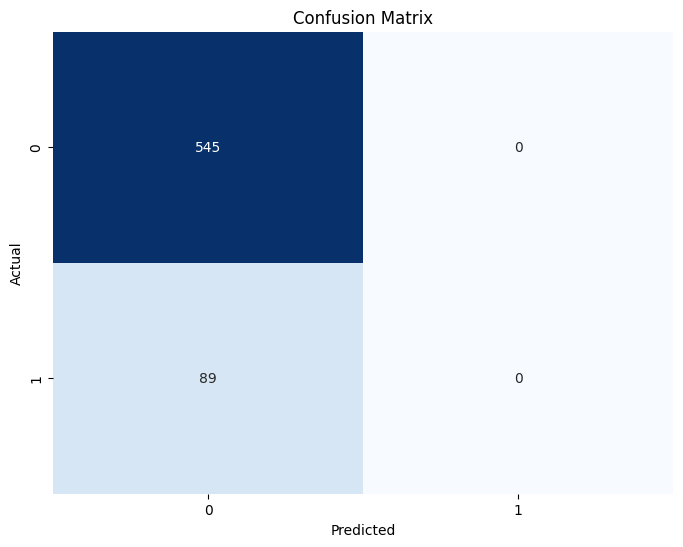

In [39]:
# Extract the sequence data and labels for training and testing
X_train = np.array([np.array(sequence) for sequence in train_df['Similarity']])
y_train = train_df['Label']

X_test = np.array([np.array(sequence) for sequence in test_df['Similarity']])
y_test = test_df['Label']

print(X_train.shape)
print(y_train.shape)

class_ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Passen Sie die Gewichtung basierend auf dem Verhältnis an
class_weights = {0: 1, 1: class_ratio}

# Flatten the sequences in the training data
X_train_flat = [seq.flatten() for seq in X_train]

# Build the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weights)

# Train the classifier on the data without SMOTE
rf_classifier.fit(X_train_flat, y_train)

# Flatten the sequences in the test data
X_test_flat = [seq.flatten() for seq in X_test]

# Make predictions on the test data using the trained classifier
y_pred_proba = rf_classifier.predict_proba(X_test_flat)

threshold = 0.4
y_pred = (y_pred_proba[:, 1] > threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('RFC confusion matrix without smote.png')
plt.show()

with open('y_test.txt', 'w') as file:
    for label in y_test:
        file.write(f'{label}\n')

with open('y_pred.txt', 'w') as file:
    for label in y_pred:
        file.write(f'{label}\n')
